In [162]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [163]:
match = pd.read_csv('C:/Users/Hp/Downloads/IPL/Matches.csv')
delivery = pd.read_csv('C:/Users/Hp/Downloads/IPL/Deliveries.csv')

In [17]:
match.head(5)

ID       City        Date Season  MatchNumber  \
0  1312200  Ahmedabad  2022-05-29   2022        Final   
1  1312199  Ahmedabad  2022-05-27   2022  Qualifier 2   
2  1312198    Kolkata  2022-05-25   2022   Eliminator   
3  1312197    Kolkata  2022-05-24   2022  Qualifier 1   
4  1304116     Mumbai  2022-05-22   2022           70   

                         Team1                 Team2  \
0             Rajasthan Royals        Gujarat Titans   
1  Royal Challengers Bangalore      Rajasthan Royals   
2  Royal Challengers Bangalore  Lucknow Super Giants   
3             Rajasthan Royals        Gujarat Titans   
4          Sunrisers Hyderabad          Punjab Kings   

                              Venue            TossWinner TossDecision  \
0  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals          bat   
1  Narendra Modi Stadium, Ahmedabad      Rajasthan Royals        field   
2             Eden Gardens, Kolkata  Lucknow Super Giants        field   
3             Eden Gardens, Kolkata        Gujarat Titans        field   
4          Wankhede Stadium, Mumbai   Sunrisers Hyderabad          bat   

  SuperOver                  WinningTeam    WonBy  Margin method  \
0         N               Gujarat Titans  Wickets     7.0    NaN   
1         N             Rajasthan Royals  Wickets     7.0    NaN   
2         N  Royal Challengers Bangalore     Runs    14.0    NaN   
3         N               Gujarat Titans  Wickets     7.0    NaN   
4         N                 Punjab Kings  Wickets     5.0    NaN   

  Player_of_Match                                       Team1Players  \
0       HH Pandya  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
1      JC Buttler  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
2      RM Patidar  ['V Kohli', 'F du Plessis', 'RM Patidar', 'GJ ...   
3       DA Miller  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...   
4   Harpreet Brar  ['PK Garg', 'Abhishek Sharma', 'RA Tripathi', ...   

                                        Team2Players        Umpire1  \
0  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...    CB Gaffaney   
1  ['YBK Jaiswal', 'JC Buttler', 'SV Samson', 'D ...    CB Gaffaney   
2  ['Q de Kock', 'KL Rahul', 'M Vohra', 'DJ Hooda...  J Madanagopal   
3  ['WP Saha', 'Shubman Gill', 'MS Wade', 'HH Pan...   BNJ Oxenford   
4  ['JM Bairstow', 'S Dhawan', 'M Shahrukh Khan',...   AK Chaudhary   

         Umpire2  
0    Nitin Menon  
1    Nitin Menon  
2       MA Gough  
3      VK Sharma  
4  NA Patwardhan

In [14]:
print('Size of matches sheet:',match.shape)

Size of matches sheet: (950, 20)


In [19]:
delivery.head(5)

ID  innings  overs  ballnumber       batter          bowler  \
0  1312200        1      0           1  YBK Jaiswal  Mohammed Shami   
1  1312200        1      0           2  YBK Jaiswal  Mohammed Shami   
2  1312200        1      0           3   JC Buttler  Mohammed Shami   
3  1312200        1      0           4  YBK Jaiswal  Mohammed Shami   
4  1312200        1      0           5  YBK Jaiswal  Mohammed Shami   

   non-striker extra_type  batsman_run  extras_run  total_run  non_boundary  \
0   JC Buttler        NaN            0           0          0             0   
1   JC Buttler    legbyes            0           1          1             0   
2  YBK Jaiswal        NaN            1           0          1             0   
3   JC Buttler        NaN            0           0          0             0   
4   JC Buttler        NaN            0           0          0             0   

   isWicketDelivery player_out kind fielders_involved       BattingTeam  
0                 0        NaN  NaN               NaN  Rajasthan Royals  
1                 0        NaN  NaN               NaN  Rajasthan Royals  
2                 0        NaN  NaN               NaN  Rajasthan Royals  
3                 0        NaN  NaN               NaN  Rajasthan Royals  
4                 0        NaN  NaN               NaN  Rajasthan Royals

In [18]:
print('Size of delivery sheet:',delivery.shape)

Size of delivery sheet: (225954, 17)


## Data cleaning

In [164]:
match=match.drop_duplicates() 
print('After removing duplicates:')
print('Size of matches sheet:',match.shape)
delivery=delivery.drop_duplicates() 
print('Size of delivery sheet:',delivery.shape)

After removing duplicates:
Size of matches sheet: (950, 20)
Size of delivery sheet: (225954, 17)


## 1. Tournament winners yearly

In [24]:
Winners=match.loc[match['MatchNumber']=='Final',['Season','WinningTeam']]
print(Winners)

      Season            WinningTeam
0       2022         Gujarat Titans
74      2021    Chennai Super Kings
134  2020/21         Mumbai Indians
194     2019         Mumbai Indians
254     2018    Chennai Super Kings
314     2017         Mumbai Indians
373     2016    Sunrisers Hyderabad
433     2015         Mumbai Indians
492     2014  Kolkata Knight Riders
552     2013         Mumbai Indians
628     2012  Kolkata Knight Riders
702     2011    Chennai Super Kings
775  2009/10    Chennai Super Kings
835     2009        Deccan Chargers
892  2007/08       Rajasthan Royals


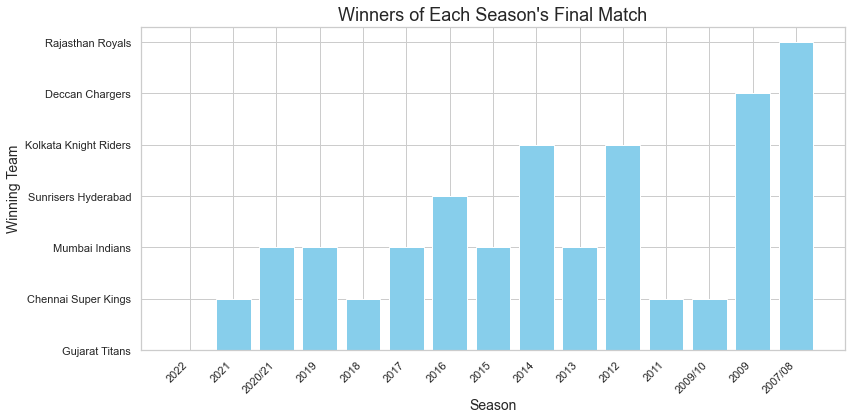

In [29]:
plt.figure(figsize=(12, 6))
plt.bar(Winners['Season'], Winners['WinningTeam'], color='skyblue')
plt.title('Winners of Each Season\'s Final Match',fontsize=18)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Winning Team',fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 2. Top3 teams with most Tournament wins

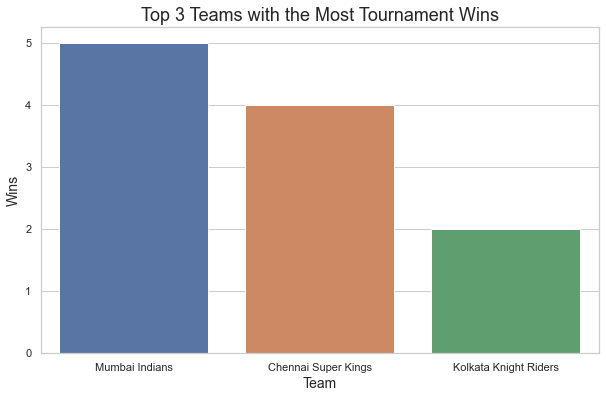

In [5]:
finals_data = match[match["MatchNumber"] == "Final"]
top3_win = finals_data['WinningTeam'].value_counts().head(3)
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.barplot(x=top3_win.index, y= top3_win.values)
plt.title("Top 3 Teams with the Most Tournament Wins",fontsize=18)
plt.xlabel("Team",fontsize=14)
plt.ylabel("Wins",fontsize=14)
plt.show()

## Team namelist

In [49]:
team_namelist = match['Team1'].unique()

for team in team_namelist:
    print(team)
print("Total number of teams:",len(team_namelist))

Rajasthan Royals
Royal Challengers Bangalore
Sunrisers Hyderabad
Delhi Capitals
Chennai Super Kings
Gujarat Titans
Lucknow Super Giants
Kolkata Knight Riders
Punjab Kings
Mumbai Indians
Kings XI Punjab
Delhi Daredevils
Rising Pune Supergiant
Gujarat Lions
Rising Pune Supergiants
Pune Warriors
Deccan Chargers
Kochi Tuskers Kerala
Total number of teams: 18


## Players namelist

In [50]:
match['Team1Players'] = match['Team1Players'].apply(lambda x: [name.strip() for name in x.strip("[]").split(", ")])
player_names1 = [name for names in match['Team1Players'] for name in names]
player_namelist1 = list(set(player_names1))
for name in player_namelist1:
    print(name)

'AA Chavan'
'ND Doshi'
'R Ashwin'
'SM Boland'
'CK Langeveldt'
'BJ Hodge'
'Harmeet Singh'
'S Narwal'
'SA Abbott'
'KB Arun Karthik'
'RA Tripathi'
'MV Boucher'
'JPR Scantlebury-Searles'
'NT Ellis'
'YV Takawale'
'TM Head'
'MJ Clarke'
'AA Bilakhia'
'PA Reddy'
'YBK Jaiswal'
'JJ Roy'
'B Laughlin'
'Ishan Kishan'
'M Pathirana'
'AJ Tye'
'A Ashish Reddy'
'A Dananjaya'
'CM Gautam'
'F Behardien'
'R McLaren'
'TA Boult'
'Gurkeerat Singh'
'PWH de Silva'
'MG Neser'
'MK Tiwary'
'SB Jakati'
'AM Salvi'
'Shakib Al Hasan'
'M Vijay'
'B Stanlake'
'SS Prabhudessai'
'KP Pietersen'
'AS Rajpoot'
'KA Jamieson'
'DT Christian'
'S Dhawan'
'MJ Lumb'
'F du Plessis'
'WPUJC Vaas'
'LRPL Taylor'
'AP Dole'
'S Kaul'
'DG Nalkande'
'J Yadav'
'B Indrajith'
'S Vidyut'
'IK Pathan'
'SR Tendulkar'
'MF Maharoof'
'KJ Abbott'
'VS Yeligati'
'AD Mathews'
'KA Pollard'
'NS Naik'
'RR Sarwan'
'Arshdeep Singh'
'SM Katich'
'D Kalyankrishna'
'TM Dilshan'
'R Vinay Kumar'
'RJ Harris'
'DNT Zoysa'
'VR Aaron'
'A Mithun'
'Mustafizur Rahman'
'OA Shah

In [51]:
match['Team2Players'] = match['Team2Players'].apply(lambda x: [name.strip() for name in x.strip("[]").split(", ")])
player_names2 = [name for names in match['Team2Players'] for name in names]
player_namelist2 = list(set(player_names2))
for name in player_namelist2:
    print(name)

'AA Chavan'
'ND Doshi'
'DR Shorey'
'R Ashwin'
'SM Boland'
'CK Langeveldt'
'BJ Hodge'
'Harmeet Singh'
'S Narwal'
'X Thalaivan Sargunam'
'SA Abbott'
'KB Arun Karthik'
'RA Tripathi'
'MV Boucher'
'JPR Scantlebury-Searles'
'NT Ellis'
'YV Takawale'
'TM Head'
'MJ Clarke'
'AA Bilakhia'
'PA Reddy'
'YBK Jaiswal'
'JJ Roy'
'B Laughlin'
'Ishan Kishan'
'AJ Tye'
'A Ashish Reddy'
'CM Gautam'
'F Behardien'
'R McLaren'
'TA Boult'
'Gurkeerat Singh'
'MDKJ Perera'
'PWH de Silva'
'MK Tiwary'
'SB Jakati'
'DAJ Bracewell'
'DR Martyn'
'AM Salvi'
'Shakib Al Hasan'
'M Vijay'
'B Stanlake'
'SS Prabhudessai'
'KP Pietersen'
'AS Rajpoot'
'KA Jamieson'
'DT Christian'
'S Dhawan'
'MJ Lumb'
'F du Plessis'
'WPUJC Vaas'
'LRPL Taylor'
'AP Dole'
'S Kaul'
'DM Bravo'
'DG Nalkande'
'J Yadav'
'A Nel'
'B Indrajith'
'S Vidyut'
'IK Pathan'
'SR Tendulkar'
'MF Maharoof'
'KJ Abbott'
'VS Yeligati'
'AD Mathews'
'KA Pollard'
'NS Naik'
'NL McCullum'
'RR Sarwan'
'Arshdeep Singh'
'SM Katich'
'D Kalyankrishna'
'TM Dilshan'
'R Vinay Kumar'
'RJ

In [52]:
players_namelist=list(set(player_namelist1 + player_namelist2))
for name in players_namelist:
    print(name)

'AA Chavan'
'ND Doshi'
'DR Shorey'
'R Ashwin'
'SM Boland'
'CK Langeveldt'
'BJ Hodge'
'Harmeet Singh'
'S Narwal'
'X Thalaivan Sargunam'
'SA Abbott'
'KB Arun Karthik'
'RA Tripathi'
'MV Boucher'
'JPR Scantlebury-Searles'
'NT Ellis'
'YV Takawale'
'TM Head'
'AA Bilakhia'
'MJ Clarke'
'PA Reddy'
'YBK Jaiswal'
'JJ Roy'
'B Laughlin'
'Ishan Kishan'
'M Pathirana'
'AJ Tye'
'A Ashish Reddy'
'A Dananjaya'
'CM Gautam'
'F Behardien'
'R McLaren'
'TA Boult'
'Gurkeerat Singh'
'MDKJ Perera'
'PWH de Silva'
'MG Neser'
'MK Tiwary'
'SB Jakati'
'DAJ Bracewell'
'DR Martyn'
'AM Salvi'
'M Vijay'
'Shakib Al Hasan'
'B Stanlake'
'SS Prabhudessai'
'KP Pietersen'
'AS Rajpoot'
'KA Jamieson'
'DT Christian'
'S Dhawan'
'MJ Lumb'
'F du Plessis'
'WPUJC Vaas'
'LRPL Taylor'
'AP Dole'
'S Kaul'
'DM Bravo'
'DG Nalkande'
'J Yadav'
'A Nel'
'B Indrajith'
'S Vidyut'
'IK Pathan'
'SR Tendulkar'
'MF Maharoof'
'KJ Abbott'
'VS Yeligati'
'AD Mathews'
'KA Pollard'
'NS Naik'
'RR Sarwan'
'NL McCullum'
'Arshdeep Singh'
'SM Katich'
'D Kalyankr

## 3. Top5 players with most Tournament wins

In [35]:
match_columns = ["ID", "WinningTeam"]
delivery_columns = ["ID", "batter"]

match_data = match[match_columns]
delivery_data = delivery[delivery_columns]

# Create a set to store the unique tournament winners
unique_winners = set(match_data["WinningTeam"].dropna())

# Create a dictionary to store the number of tournament wins for each player
player_wins = {player: 0 for player in delivery_data["batter"].unique()}

# Iterate through the match data to count the tournament wins for each player
for index, row in match_data.iterrows():
    match_id = row["ID"]
    winner = row["WinningTeam"]
    players = delivery_data[delivery_data["ID"] == match_id]["batter"].unique()
    for player in players:
        if winner in unique_winners:
            player_wins[player] += 1

# Sort the players by the number of tournament wins in descending order
top_players = sorted(player_wins.items(), key=lambda x: x[1], reverse=True)[:5]

# Print the top 5 players with the most tournament wins
print("Top 5 Players with Most Tournament Wins:")
for player, wins in top_players:
    print(f"{player}: {wins} wins")

Top 5 Players with Most Tournament Wins:
RG Sharma: 221 wins
V Kohli: 212 wins
KD Karthik: 206 wins
S Dhawan: 205 wins
MS Dhoni: 205 wins


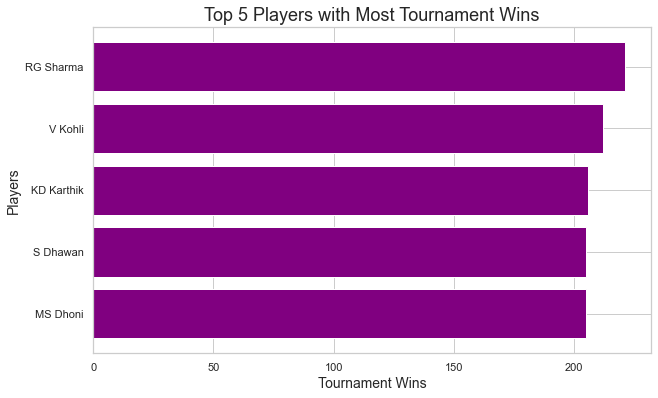

In [37]:
players, wins = zip(*top_players)

# bar plot
plt.figure(figsize=(10, 6))
plt.barh(players, wins, color='purple')
plt.xlabel('Tournament Wins',fontsize=14)
plt.ylabel('Players',fontsize=14)
plt.title('Top 5 Players with Most Tournament Wins',fontsize=18)
plt.gca().invert_yaxis()  # To display the player with the most wins at the top
plt.show()

## 4a. Purple cap

In [30]:
delivery['isWicketDelivery'] = delivery['isWicketDelivery'].apply(lambda x: 1 if x == 1 else 0)
merged_data = pd.merge(delivery, match, on="ID")
wickets_taken = merged_data.groupby(["Season", "bowler"])["isWicketDelivery"].sum()

# bowler with the most wickets taken in each "year"
wickets = wickets_taken.groupby("Season").idxmax()
purple_cap = wickets_taken.loc[wickets]

# highest wicket-taker for each "year"
print("Purple cap - Yearwise:")
for Season, bowler, wickets in purple_cap.reset_index().values:
    print(f"IPL {Season}: {bowler} - {wickets} wickets")

Purple cap - Yearwise:
IPL 2007/08: Sohail Tanvir - 24 wickets
IPL 2009: RP Singh - 26 wickets
IPL 2009/10: PP Ojha - 22 wickets
IPL 2011: SL Malinga - 30 wickets
IPL 2012: M Morkel - 30 wickets
IPL 2013: DJ Bravo - 34 wickets
IPL 2014: MM Sharma - 26 wickets
IPL 2015: DJ Bravo - 28 wickets
IPL 2016: B Kumar - 24 wickets
IPL 2017: B Kumar - 28 wickets
IPL 2018: AJ Tye - 28 wickets
IPL 2019: K Rabada - 29 wickets
IPL 2020/21: K Rabada - 32 wickets
IPL 2021: HV Patel - 35 wickets
IPL 2022: YS Chahal - 29 wickets


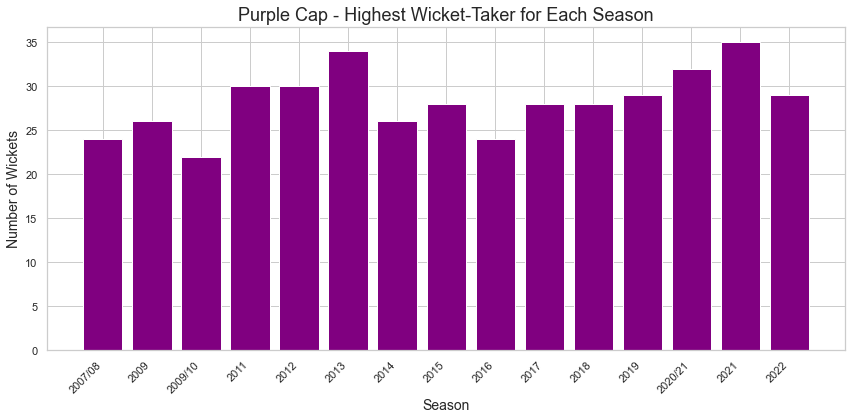

In [33]:
plt.figure(figsize=(12, 6))
plt.bar(purple_cap.reset_index()["Season"], purple_cap.values, color='purple')
plt.title('Purple Cap - Highest Wicket-Taker for Each Season',fontsize=18)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Number of Wickets',fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 4b. Orange cap

In [165]:
merged_data1 = pd.merge(delivery, match, on="ID")
runs_by_player = merged_data1.groupby(["Season", "batter"])["batsman_run"].sum()

# player with the most runs in each tournament
runs = runs_by_player.groupby("Season").idxmax()
orange_cap = runs_by_player.loc[runs]

# player with the most runs in each tournament
print("Orange cap - Yearwise:")
for Season, batter, runs in orange_cap.reset_index().values:
    print(f"Tournament {Season}: {batter} - {runs} runs")

Orange cap - Yearwise:
Tournament 2007/08: SE Marsh - 616 runs
Tournament 2009: ML Hayden - 572 runs
Tournament 2009/10: SR Tendulkar - 618 runs
Tournament 2011: CH Gayle - 608 runs
Tournament 2012: CH Gayle - 733 runs
Tournament 2013: MEK Hussey - 733 runs
Tournament 2014: RV Uthappa - 660 runs
Tournament 2015: DA Warner - 562 runs
Tournament 2016: V Kohli - 973 runs
Tournament 2017: DA Warner - 641 runs
Tournament 2018: KS Williamson - 735 runs
Tournament 2019: DA Warner - 692 runs
Tournament 2020/21: KL Rahul - 676 runs
Tournament 2021: RD Gaikwad - 635 runs
Tournament 2022: JC Buttler - 863 runs


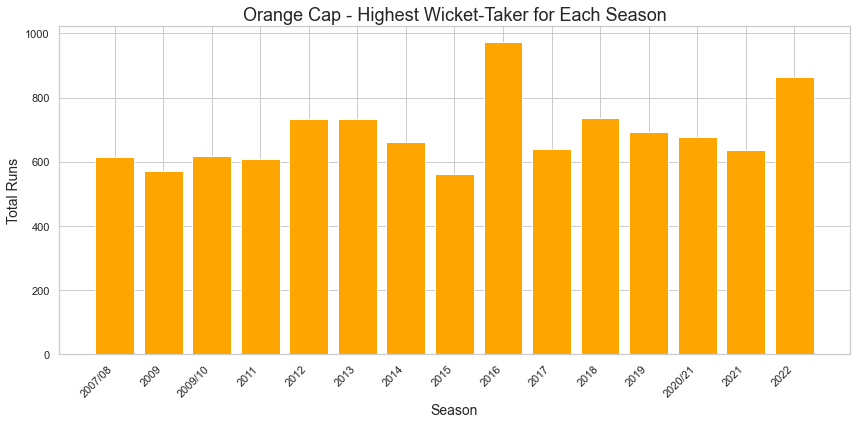

In [167]:
plt.figure(figsize=(12, 6))
plt.bar(orange_cap.reset_index()["Season"], orange_cap.values, color='orange')
plt.title('Orange Cap - Highest Wicket-Taker for Each Season',fontsize=18)
plt.xlabel('Season',fontsize=14)
plt.ylabel('Total Runs',fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 5. Top5 team with most toss win

Top 5 Teams that won the most tosses:
Mumbai Indians                 123
Kolkata Knight Riders          114
Chennai Super Kings            109
Royal Challengers Bangalore    105
Rajasthan Royals                99
Name: TossWinner, dtype: int64


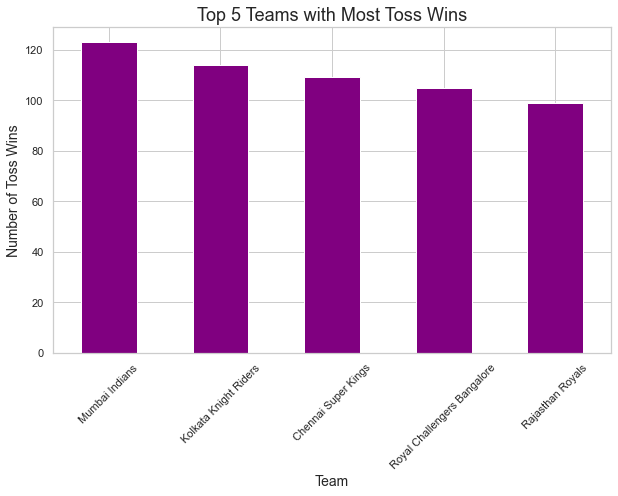

In [41]:
toss_winner = match["TossWinner"].value_counts()
top5_toss = toss_winner.head(5)
print("Top 5 Teams that won the most tosses:")
print(top5_toss)

plt.figure(figsize=(10, 6))
top5_toss.plot(kind='bar', color='purple')
plt.title('Top 5 Teams with Most Toss Wins',fontsize=18)
plt.xlabel('Team',fontsize=14)
plt.ylabel('Number of Toss Wins',fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 6a. Top5 teams that won most matches by batting first - overall

Top 5 Teams that won the most matches by Batting first:
Chennai Super Kings            59
Mumbai Indians                 52
Kolkata Knight Riders          42
Rajasthan Royals               40
Royal Challengers Bangalore    35
Name: WinningTeam, dtype: int64


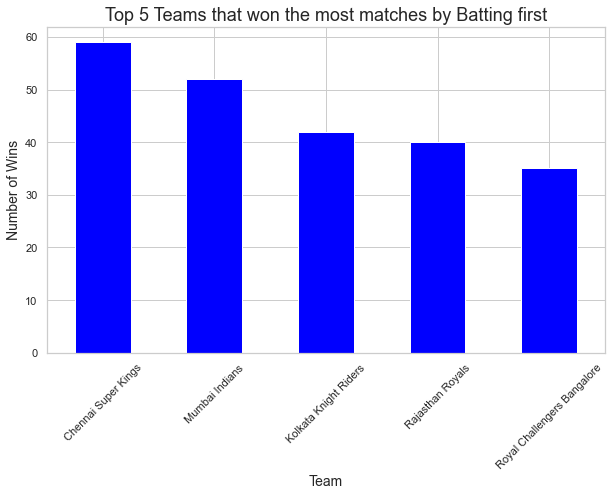

In [43]:
batting_first = match[match["TossDecision"] == "bat"]
batting_wins = batting_first["WinningTeam"].value_counts()
top_5_winners = batting_wins.head(5)
print("Top 5 Teams that won the most matches by Batting first:")
print(top_5_winners)

plt.figure(figsize=(10, 6))
top_5_winners.plot(kind='bar', color='blue')
plt.title('Top 5 Teams that won the most matches by Batting first',fontsize=18)
plt.xlabel('Team',fontsize=14)
plt.ylabel('Number of Wins',fontsize=14)
plt.xticks(rotation=45)
plt.show()

## 6b. Top5 teams that won most matches by batting first - yearwise

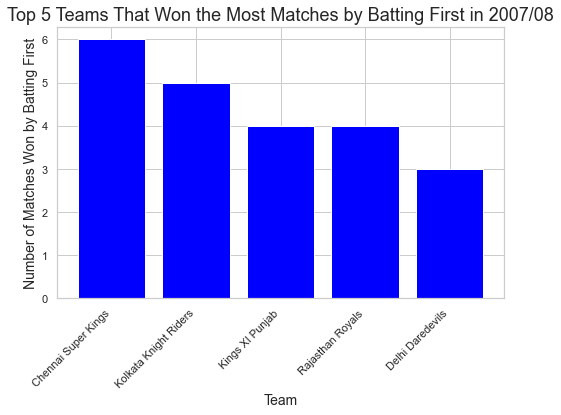

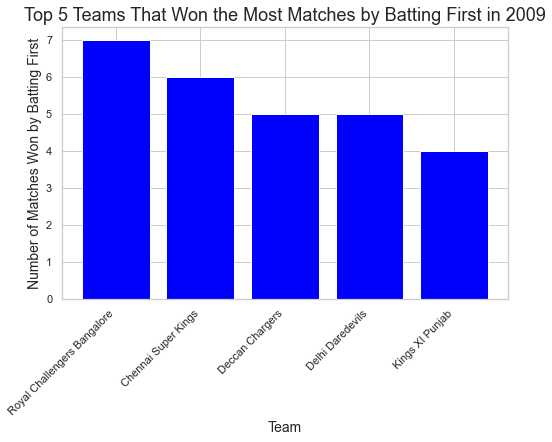

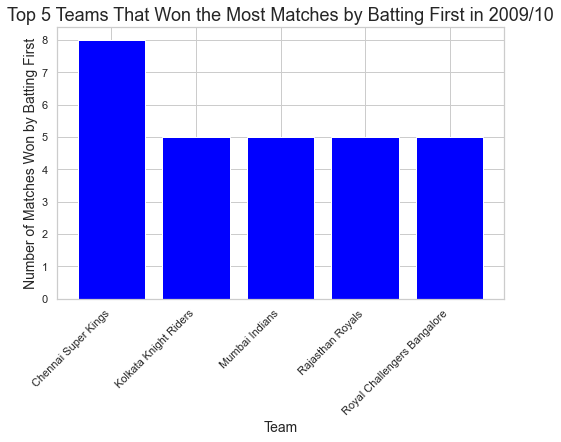

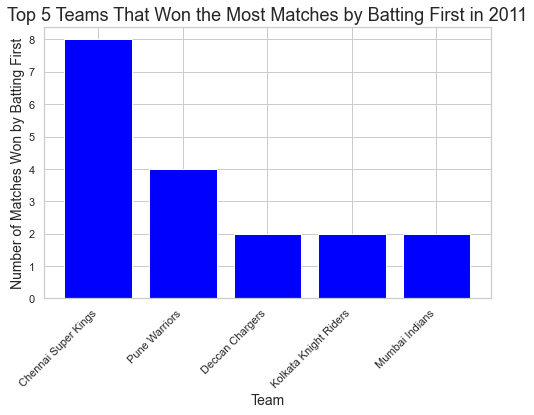

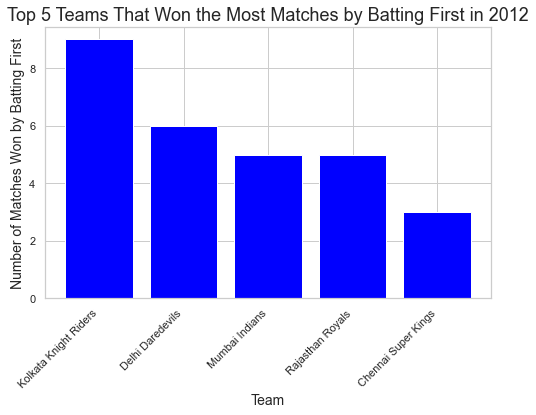

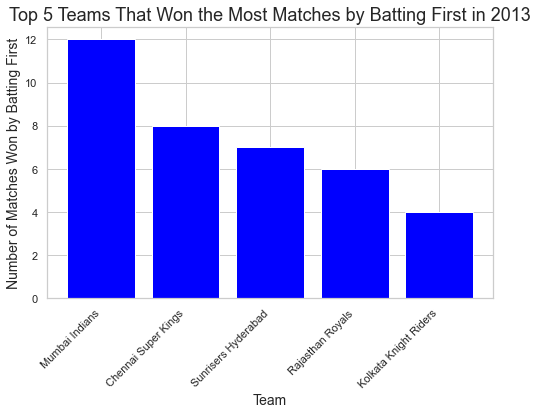

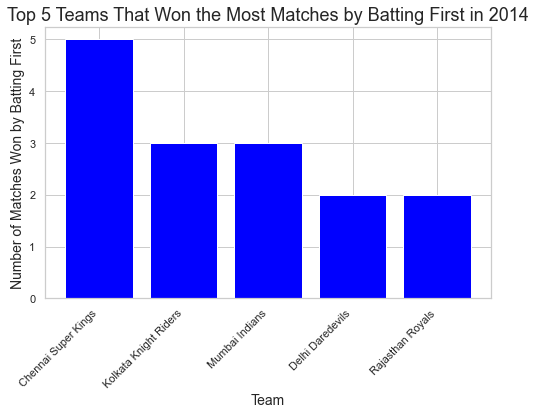

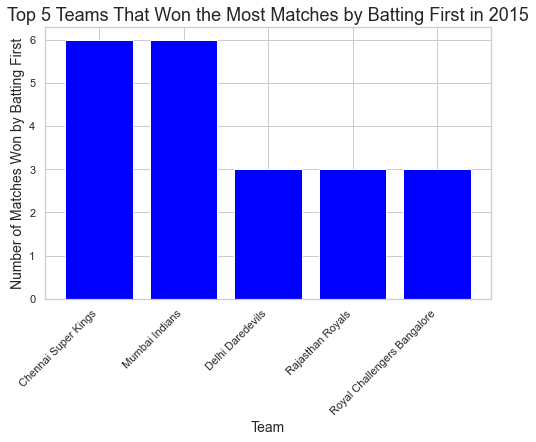

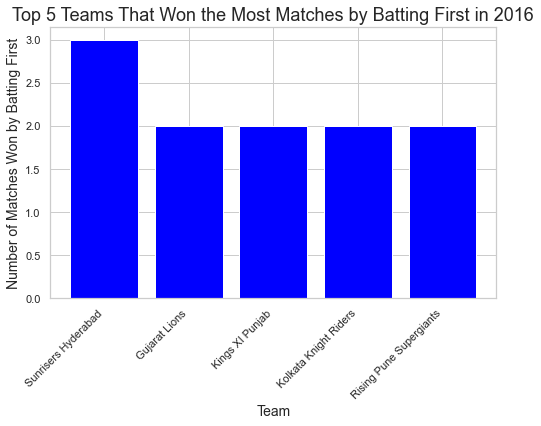

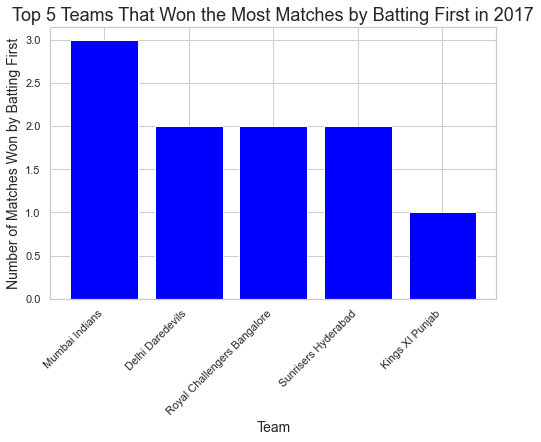

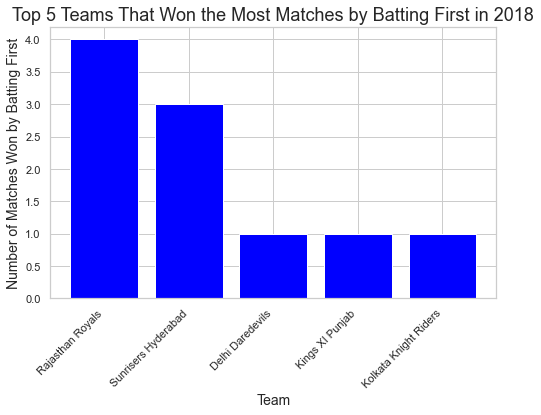

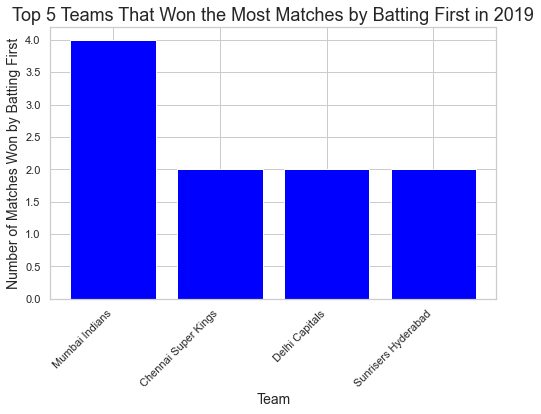

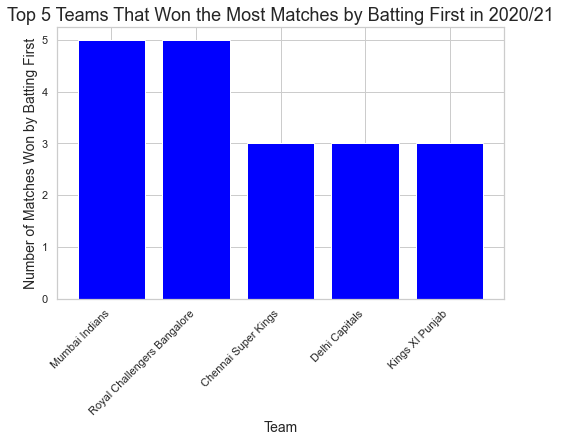

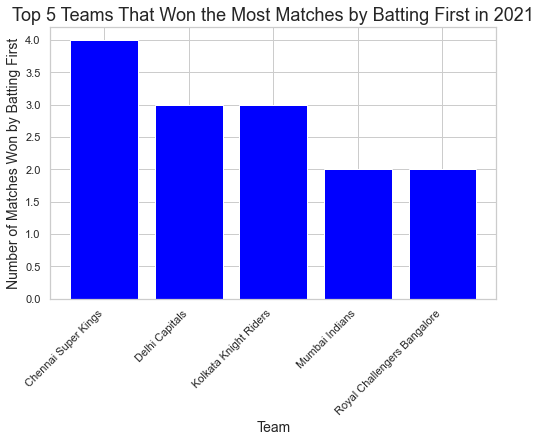

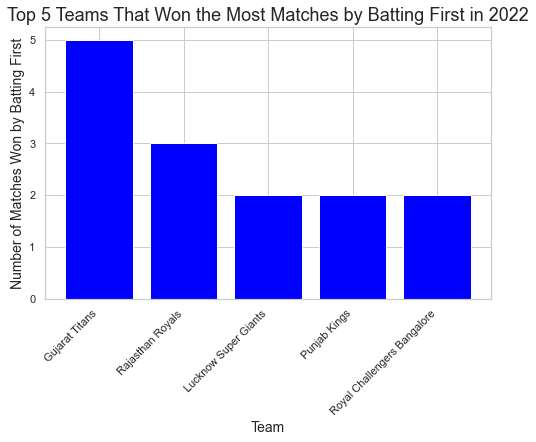

In [172]:
batting_first = match[match["TossDecision"] == "bat"]
firstbatting_wins_yearwise = batting_first.groupby(["Season", "WinningTeam"]).size().reset_index(name="MatchesWon")
firstbatting_wins_yearwise = firstbatting_wins_yearwise.sort_values(by=["Season", "MatchesWon"], ascending=[True, False])
top_5_winners_yearwise = firstbatting_wins_yearwise.groupby("Season").head(5)
for year, data in top_5_winners_yearwise.groupby("Season"):
    plt.figure(figsize=(8, 5))
    plt.bar(data["WinningTeam"], data["MatchesWon"], color='blue')
    plt.title(f"Top 5 Teams That Won the Most Matches by Batting First in {year}",fontsize=18)
    plt.xlabel("Team",fontsize=14)
    plt.ylabel("Number of Matches Won by Batting First",fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.show()


In [169]:
print(top_5_winners_yearwise)

      Season                  WinningTeam  MatchesWon
0    2007/08          Chennai Super Kings           6
3    2007/08        Kolkata Knight Riders           5
2    2007/08              Kings XI Punjab           4
5    2007/08             Rajasthan Royals           4
1    2007/08             Delhi Daredevils           3
..       ...                          ...         ...
99      2022               Gujarat Titans           5
103     2022             Rajasthan Royals           3
101     2022         Lucknow Super Giants           2
102     2022                 Punjab Kings           2
104     2022  Royal Challengers Bangalore           2

[74 rows x 3 columns]


## 7a. Top5 teams who won most matches by bowling first - Yearwise

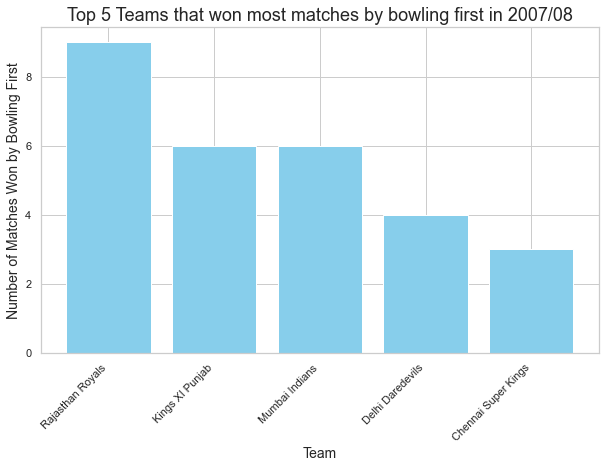

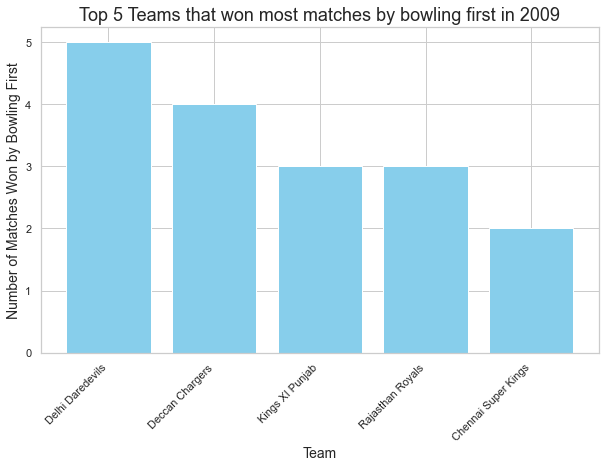

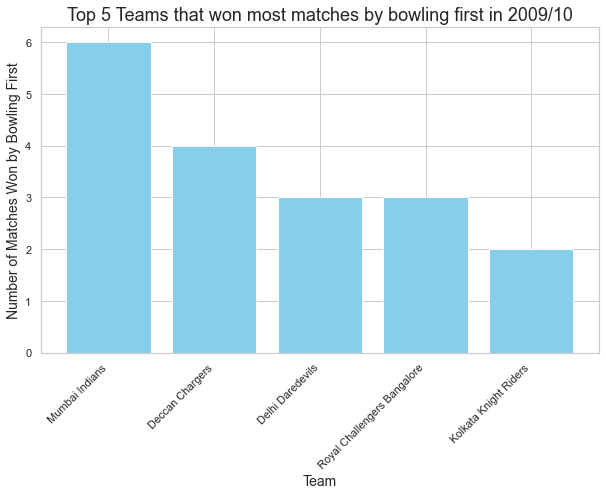

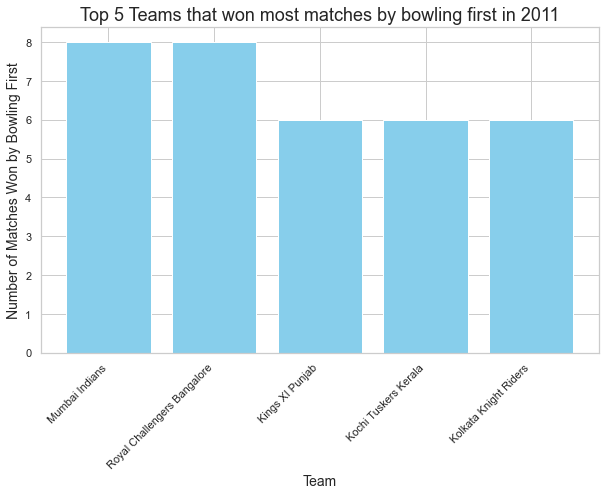

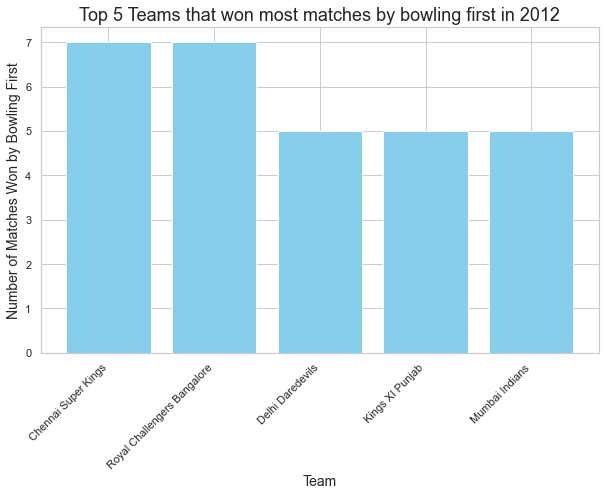

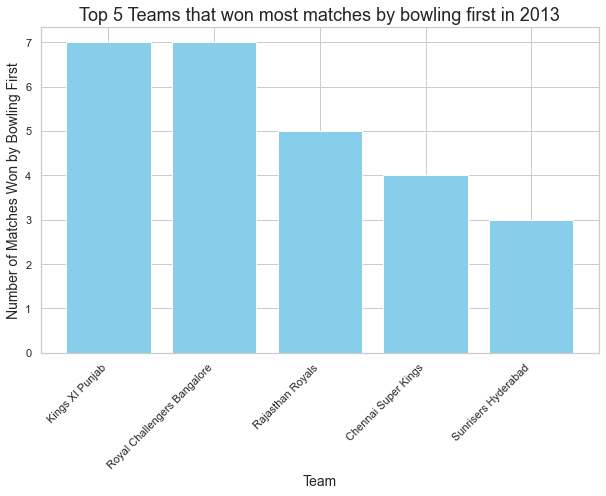

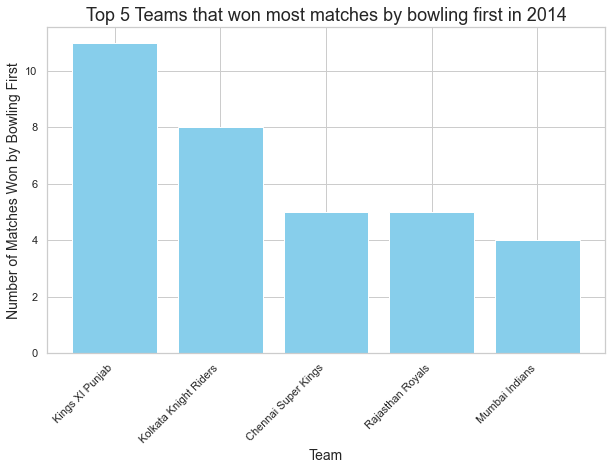

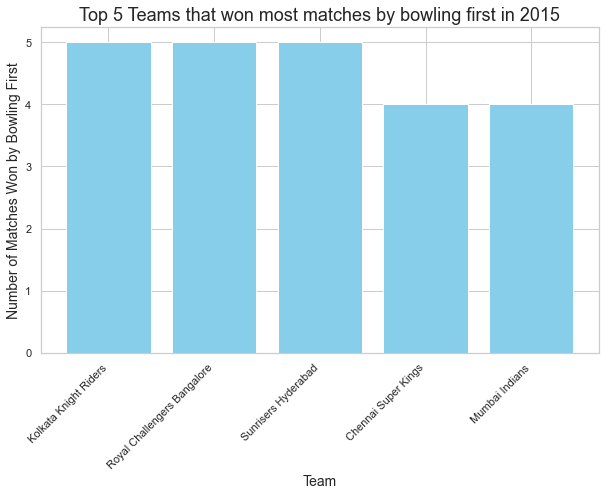

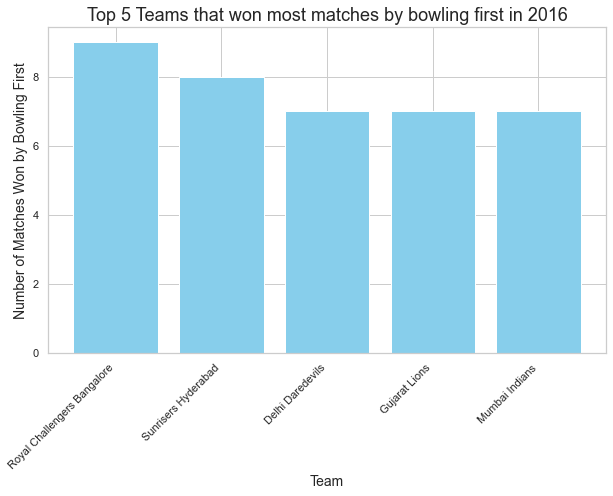

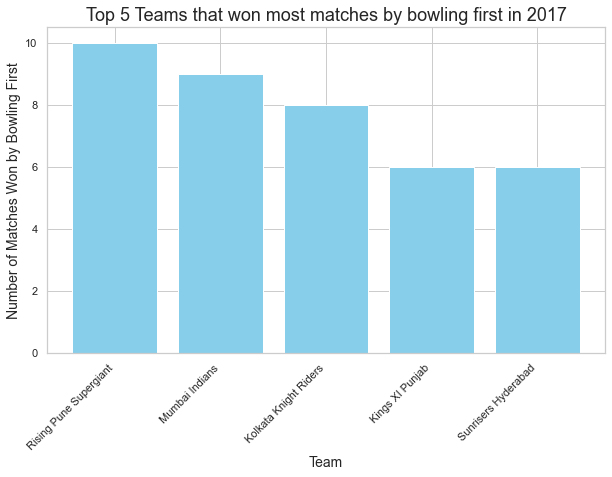

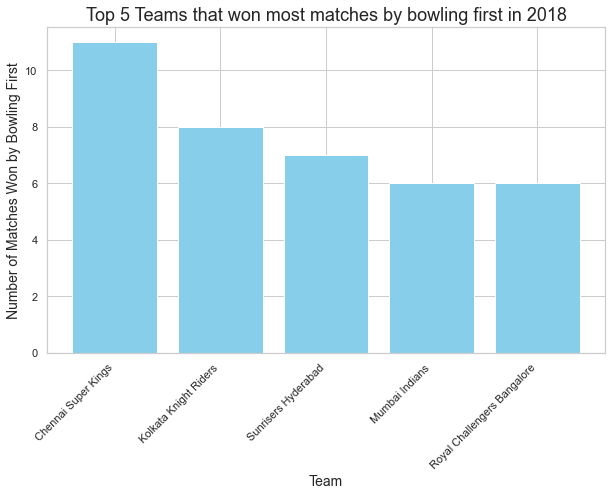

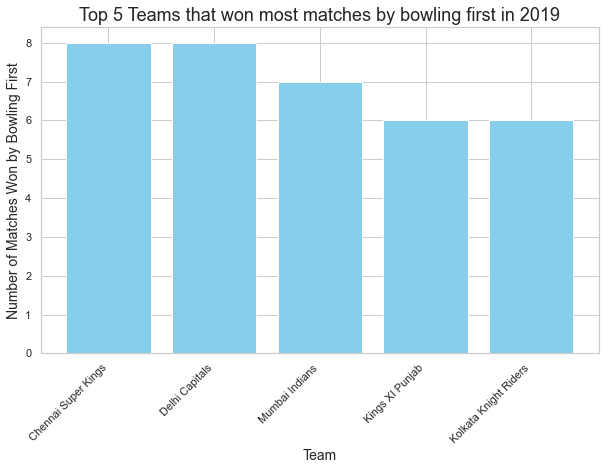

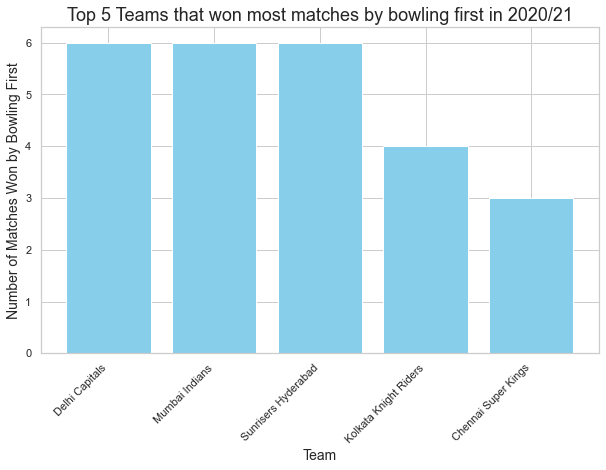

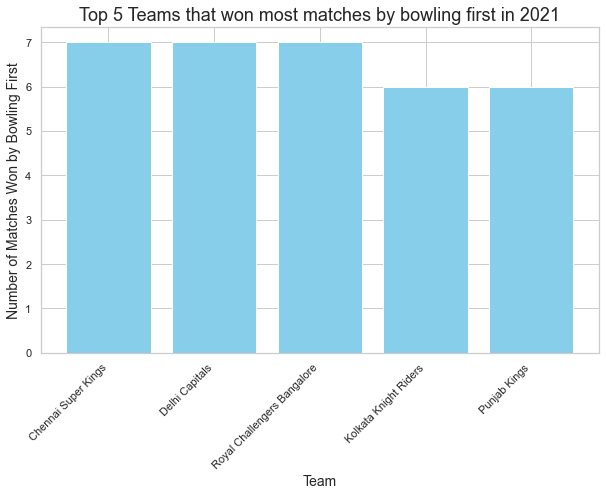

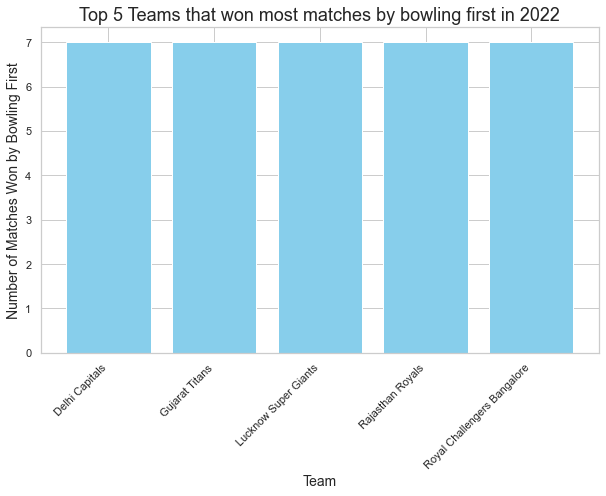

In [175]:
bowling_first = match[match["TossDecision"] == "field"]
bowlingfirst_wins_yearwise = bowling_first.groupby(["Season", "WinningTeam"]).size().reset_index(name="MatchesWon")
bowlingfirst_wins_yearwise = bowlingfirst_wins_yearwise.sort_values(by=["Season", "MatchesWon"], ascending=[True, False])

# Get the top 5 winners for each year
top5_winners_yearwise = bowlingfirst_wins_yearwise.groupby("Season").head(5)

# Separate plots for each year
for year, data in top5_winners_yearwise.groupby("Season"):
    plt.figure(figsize=(10, 6))
    plt.bar(data["WinningTeam"], data["MatchesWon"], color='skyblue')
    plt.title(f"Top 5 Teams that won most matches by bowling first in {year}", fontsize=18)
    plt.xlabel("Team", fontsize=14)
    plt.ylabel("Number of Matches Won by Bowling First", fontsize=14)
    plt.xticks(rotation=45, ha="right")
    plt.show()

## 7b. Top5 teams who won most matches by bowling first - Overall

Top 5 teams who won most matches by bowling first:
                           Team  MatchesWon
0               Mumbai Indians          79
1  Royal Challengers Bangalore          74
2        Kolkata Knight Riders          72
3              Kings XI Punjab          64
4          Chennai Super Kings          62


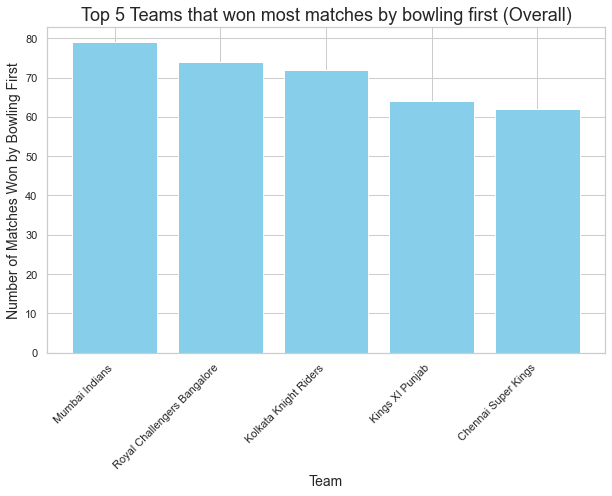

In [47]:
bowling_first_matches = match[match["TossDecision"] == "field"]
bowling_first_wins = bowling_first_matches["WinningTeam"].value_counts().reset_index()
bowling_first_wins.columns = ["Team", "MatchesWon"]
top_5_bowling_first_winners = bowling_first_wins.head(5)
print('Top 5 teams who won most matches by bowling first:\n', top_5_bowling_first_winners)

# bar plot
plt.figure(figsize=(10, 6))
plt.bar(top_5_bowling_first_winners["Team"], top_5_bowling_first_winners["MatchesWon"], color='skyblue')
plt.title("Top 5 Teams that won most matches by bowling first (Overall)",fontsize=18)
plt.xlabel("Team",fontsize=14)
plt.ylabel("Number of Matches Won by Bowling First",fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()


## 8. Top5 players who played with most number of teams

Top 5 Players Who Played with the Most Number of Teams:
'AA Chavan': 18 teams
'ND Doshi': 18 teams
'DR Shorey': 18 teams
'R Ashwin': 18 teams
'SM Boland': 18 teams


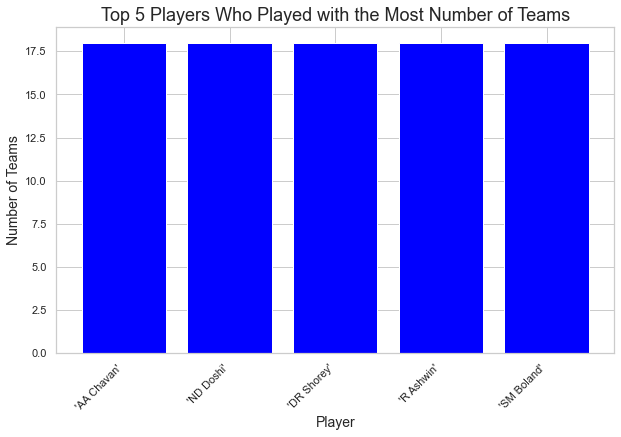

In [177]:
player_teams = {}
for index, row in match.iterrows():
    team1 = row["Team1"]
    team2 = row["Team2"]
    for player in players_namelist:
        if team1 in team_namelist and team2 in team_namelist:
            if player not in player_teams:
                player_teams[player] = set()
            player_teams[player].add(team1)
            player_teams[player].add(team2)

# DataFrame to count the number of teams each player has played for
player_teams_count = {player: len(teams) for player, teams in player_teams.items()}

# top 5 players who played with the most number of teams
top5_players_teams_count = dict(sorted(player_teams_count.items(), key=lambda x: x[1], reverse=True)[:5])
print("Top 5 Players Who Played with the Most Number of Teams:")
for player, count in top5_players_teams_count.items():
    print(f"{player}: {count} teams")

sorted_players_teams_count = dict(sorted(player_teams_count.items(), key=lambda x: x[1], reverse=True)[:5])

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(sorted_players_teams_count.keys(), sorted_players_teams_count.values(), color='blue')
plt.title("Top 5 Players Who Played with the Most Number of Teams", fontsize=18)
plt.xlabel("Player", fontsize=14)
plt.ylabel("Number of Teams", fontsize=14)
plt.xticks(rotation=45, ha="right")
plt.show()

## 9a. Top5 players with High strikerate and low strikerate - overall

Top 5 Players with Highest Strike Rates:
              StrikeRate
batter                  
TH David      198.936170
LJ Wright     168.253968
AD Russell    168.234323
KK Cooper     165.714286
Kamran Akmal  164.102564
Top 5 Players with Lowest Strike Rates:
             StrikeRate
batter                 
YS Chahal     41.573034
S Nadeem      44.318182
AB Dinda      52.000000
NS Naik       58.490566
S Sreesanth   59.649123


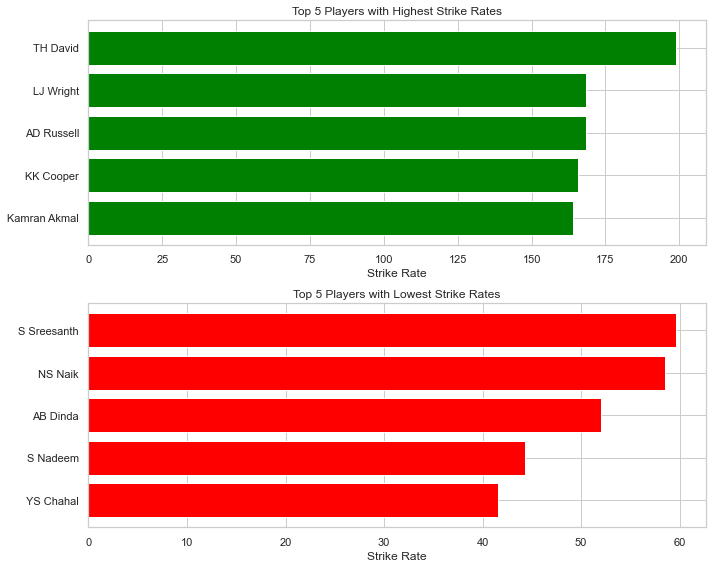

In [178]:
merged_data = match.merge(delivery, on='ID')
player_match_counts = merged_data['batter'].value_counts()
eligible_players = player_match_counts[player_match_counts >= 50].index
filtered_data = merged_data[merged_data['batter'].isin(eligible_players)]
player_stats = filtered_data.groupby('batter').agg({'batter': 'count', 'batsman_run': 'sum'})

# strike rate for each player
player_stats['StrikeRate'] = (player_stats['batsman_run'] / player_stats['batter']) * 100
top5_highstrikerate = player_stats.sort_values(by='StrikeRate', ascending=False).head(5)
top5_lowstrikerate = player_stats.sort_values(by='StrikeRate').head(5)

# top 5 players with the highest strike rates
print("Top 5 Players with Highest Strike Rates:")
print(top5_highstrikerate[['StrikeRate']])

# top 5 players with the lowest strike rates
print("Top 5 Players with Lowest Strike Rates:")
print(top5_lowstrikerate[['StrikeRate']])

# Plotting
top5_highstrikerate = top5_highstrikerate.sort_values(by='StrikeRate', ascending=True)
top5_lowstrikerate = top5_lowstrikerate.sort_values(by='StrikeRate', ascending=True)
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(10, 8))
# Top 5 Players with Highest Strike Rates
axes[0].barh(top5_highstrikerate.index, top5_highstrikerate['StrikeRate'], color='green')
axes[0].set_title('Top 5 Players with Highest Strike Rates')
axes[0].set_xlabel('Strike Rate')
# Top 5 Players with Lowest Strike Rates
axes[1].barh(top5_lowstrikerate.index, top5_lowstrikerate['StrikeRate'], color='red')
axes[1].set_title('Top 5 Players with Lowest Strike Rates')
axes[1].set_xlabel('Strike Rate')

plt.tight_layout()
plt.show()

## 9b. Top5 players with High strikerate and low strikerate - yearwise

In [179]:
top_5_high_strike_rates = []
top_5_low_strike_rates = []
years = merged_data['Season'].unique()

# Iterate through each year
for year in years:
    year_data = merged_data[merged_data['Season'] == year]
    player_match_counts = year_data['batter'].value_counts()
    eligible_players = player_match_counts[player_match_counts >= 2].index
    year_data = year_data[year_data['batter'].isin(eligible_players)]
    player_stats = year_data.groupby('batter').agg({'batter': 'count', 'batsman_run': 'sum'})

    #strike rate for each player
    player_stats['StrikeRate'] = (player_stats['batsman_run'] / player_stats['batter']) * 100
    top_5_high_strike_rates_year = player_stats.sort_values(by='StrikeRate', ascending=False).head(5)
    top_5_low_strike_rates_year = player_stats.sort_values(by='StrikeRate').head(5)

    # Append the results for the current year to the lists
    top_5_high_strike_rates.append(top_5_high_strike_rates_year)
    top_5_low_strike_rates.append(top_5_low_strike_rates_year)

# top 5 players with the highest strike rates year-wise
print("Top 5 Players with Highest Strike Rates Year-Wise:")
for year, data in zip(years, top_5_high_strike_rates):
    print(f"Year {year}:")
    print(data[['StrikeRate']])
    print()

# top 5 players with the lowest strike rates year-wise
print("Top 5 Players with Lowest Strike Rates Year-Wise:")
for year, data in zip(years, top_5_low_strike_rates):
    print(f"Year {year}:")
    print(data[['StrikeRate']])
    print()

Top 5 Players with Highest Strike Rates Year-Wise:
Year 2022:
             StrikeRate
batter                 
PJ Cummins   262.500000
Rashid Khan  206.818182
TH David     204.395604
RV Patel     200.000000
SP Narine    177.500000

Year 2021:
            StrikeRate
batter                
J Suchith   233.333333
K Rabada    216.666667
DJ Bravo    213.636364
SM Curran   186.666667
Avesh Khan  166.666667

Year 2020/21:
              StrikeRate
batter                  
KA Pollard    178.980892
TU Deshpande  175.000000
JC Archer     171.212121
HH Pandya     169.461078
JJ Bumrah     166.666667

Year 2019:
             StrikeRate
batter                 
I Sharma     333.333333
KC Cariappa  300.000000
MK Lomror    266.666667
SN Thakur    200.000000
AD Russell   187.591241

Year 2018:
             StrikeRate
batter                 
SN Thakur    300.000000
B Stanlake   250.000000
K Gowtham    188.059701
Rashid Khan  184.375000
HV Patel     181.818182

Year 2017:
             StrikeRate
batter     

## 10a. Most consistent batsman and bowler - overall

In [181]:
merged_data = match.merge(delivery, on='ID')
player_match_counts = merged_data['batter'].value_counts().reset_index()
player_match_counts.columns = ['batter', 'matches_played']
player_runs = merged_data.groupby('batter')['batsman_run'].agg(total_runs='sum', total_balls_faced='count').reset_index()
player_runs['strike_rate'] = (player_runs['total_runs'] / player_runs['total_balls_faced']) * 100
# years played by each player based on the "Year" column
years_played = merged_data.groupby('batter')['Season'].nunique().reset_index()
years_played.columns = ['batter', 'years_played']

merged_stats = pd.merge(player_runs, years_played, on='batter')
filtered_players = merged_stats[(merged_stats['total_runs'] > 6000) & (merged_stats['years_played'] > 6)]
filtered_players['std'] = filtered_players['total_runs'].std()

most_consistent_batsman = filtered_players.sort_values(by=['std', 'strike_rate'], ascending=[True, False]).iloc[0]

# most consistent batsman
print("Most Consistent Batsman:")
print("Player Name:", most_consistent_batsman['batter'])
print("Total Runs Scored:", most_consistent_batsman['total_runs'])

Most Consistent Batsman:
Player Name: V Kohli
Total Runs Scored: 6634


C:\Users\Hp\AppData\Local\Temp/ipykernel_10664/3359244376.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_players['std'] = filtered_players['total_runs'].std()


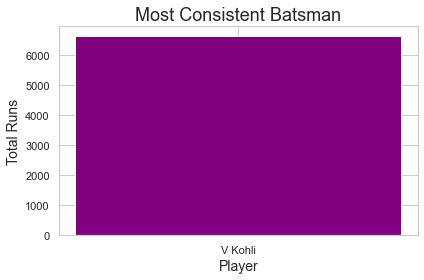

In [182]:
plt.bar(most_consistent_batsman['batter'], most_consistent_batsman['total_runs'], color='purple')
plt.title('Most Consistent Batsman',fontsize=18)
plt.xlabel('Player',fontsize=14)
plt.ylabel('Total Runs',fontsize=14)
plt.tight_layout()
plt.show()

In [74]:
merged_data = match.merge(delivery, on='ID')
years_played = merged_data.groupby('bowler')['Season'].nunique().reset_index()
years_played.columns = ['bowler', 'years_played']
# total wickets taken by each player
player_wickets = merged_data[merged_data['isWicketDelivery'] == 1].groupby('bowler')['isWicketDelivery'].count().reset_index()
player_wickets.columns = ['bowler', 'total_wickets']

merged_stats = pd.merge(player_wickets, years_played, on='bowler')
filtered_players = merged_stats[(merged_stats['total_wickets'] > 150) & (merged_stats['years_played'] > 4)]
top_bowler = filtered_players.sort_values(by='total_wickets', ascending=False).iloc[0]

# most consistent bowler
print("Most Consistent Bowler:")
print(f"Player Name: {top_bowler['bowler']}")
print(f"Total Wickets Taken: {top_bowler['total_wickets']}")

Most Consistent Bowler:
Player Name: DJ Bravo
Total Wickets Taken: 207


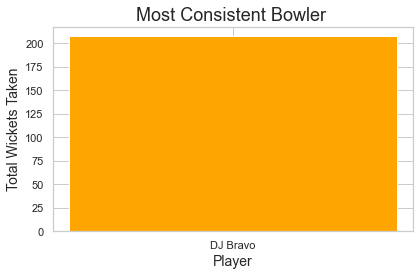

In [77]:
plt.bar(top_bowler['bowler'], top_bowler['total_wickets'], color='orange')
plt.title('Most Consistent Bowler ',fontsize=18)
plt.xlabel('Player',fontsize=14)
plt.ylabel('Total Wickets Taken',fontsize=14)
plt.tight_layout()
plt.show()

## 10b. Most consistent batsman and bowler - yearwise

In [183]:
consistent_batsmen_yearwise = []
years = merged_data['Season'].unique()

for year in years:
    year_data = merged_data[merged_data['Season'] == year]
    player_runs = year_data.groupby('batter')['batsman_run'].agg(total_runs='sum', total_balls_faced='count').reset_index()
    player_runs['strike_rate'] = (player_runs['total_runs'] / player_runs['total_balls_faced']) * 100
    player_runs['std'] = player_runs['total_runs'].std()
    filtered_players = player_runs[player_runs['total_runs'] > 500]
    most_consistent_batsman_yearwise = filtered_players.sort_values(by=['std', 'strike_rate'], ascending=[True, False])

    # most consistent batsman for the current year to the results list
    if not most_consistent_batsman_yearwise.empty:
        top_batsman = most_consistent_batsman_yearwise.iloc[0]
        consistent_batsmen_yearwise.append(top_batsman)

# most consistent batsmen year-wise
print("Most Consistent Batsmen Year-Wise:")
for year, batsman in zip(years, consistent_batsmen_yearwise):
    print(f"Year {year}:")
    print("Player Name:", batsman['batter'])
    print("Total Runs Scored:", batsman['total_runs'])
    print()

Most Consistent Batsmen Year-Wise:
Year 2022:
Player Name: Q de Kock
Total Runs Scored: 508

Year 2021:
Player Name: GJ Maxwell
Total Runs Scored: 513

Year 2020/21:
Player Name: Ishan Kishan
Total Runs Scored: 516

Year 2019:
Player Name: AD Russell
Total Runs Scored: 514

Year 2018:
Player Name: RR Pant
Total Runs Scored: 684

Year 2017:
Player Name: DA Warner
Total Runs Scored: 641

Year 2016:
Player Name: AB de Villiers
Total Runs Scored: 687

Year 2015:
Player Name: AB de Villiers
Total Runs Scored: 513

Year 2014:
Player Name: GJ Maxwell
Total Runs Scored: 552

Year 2013:
Player Name: CH Gayle
Total Runs Scored: 720

Year 2012:
Player Name: CH Gayle
Total Runs Scored: 733

Year 2011:
Player Name: CH Gayle
Total Runs Scored: 608

Year 2009/10:
Player Name: SK Raina
Total Runs Scored: 528

Year 2009:
Player Name: ML Hayden
Total Runs Scored: 572

Year 2007/08:
Player Name: ST Jayasuriya
Total Runs Scored: 514



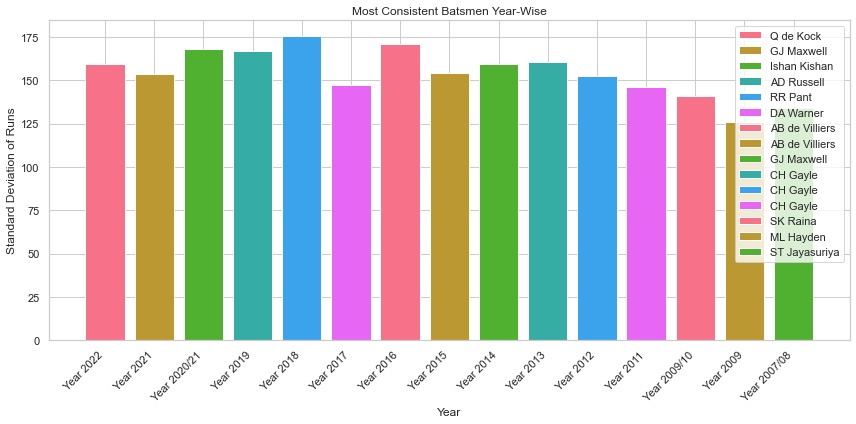

In [184]:
plt.figure(figsize=(12, 6))
for year, batsman in zip(years, consistent_batsmen_yearwise):
    plt.bar(f"Year {year}", batsman['std'], label=batsman['batter'])

plt.title('Most Consistent Batsmen Year-Wise')
plt.xlabel('Year')
plt.ylabel('Standard Deviation of Runs')
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

In [185]:
merged_data = match.merge(delivery, on='ID')
consistent_bowlers_yearwise = []
years = merged_data['Season'].unique()

for year in years:
    year_data = merged_data[merged_data['Season'] == year]
    player_wickets = year_data[year_data['isWicketDelivery'] == 1].groupby('bowler')['isWicketDelivery'].count().reset_index()
    player_wickets.columns = ['bowler', 'total_wickets']
    top_bowler_yearwise = player_wickets.sort_values(by='total_wickets', ascending=False)
   
    if not top_bowler_yearwise.empty:
        consistent_bowlers_yearwise.append(top_bowler_yearwise.iloc[0])

# most consistent bowlers year-wise
print("Most Consistent Bowlers Year-Wise:")
for year, bowler in zip(years, consistent_bowlers_yearwise):
    print(f"Year {year}:")
    print("Player Name:", bowler['bowler'])
    print("Total Wickets Taken:", bowler['total_wickets'])
    print()

Most Consistent Bowlers Year-Wise:
Year 2022:
Player Name: YS Chahal
Total Wickets Taken: 29

Year 2021:
Player Name: HV Patel
Total Wickets Taken: 35

Year 2020/21:
Player Name: K Rabada
Total Wickets Taken: 32

Year 2019:
Player Name: K Rabada
Total Wickets Taken: 29

Year 2018:
Player Name: AJ Tye
Total Wickets Taken: 28

Year 2017:
Player Name: B Kumar
Total Wickets Taken: 28

Year 2016:
Player Name: B Kumar
Total Wickets Taken: 24

Year 2015:
Player Name: DJ Bravo
Total Wickets Taken: 28

Year 2014:
Player Name: MM Sharma
Total Wickets Taken: 26

Year 2013:
Player Name: DJ Bravo
Total Wickets Taken: 34

Year 2012:
Player Name: M Morkel
Total Wickets Taken: 30

Year 2011:
Player Name: SL Malinga
Total Wickets Taken: 30

Year 2009/10:
Player Name: PP Ojha
Total Wickets Taken: 22

Year 2009:
Player Name: RP Singh
Total Wickets Taken: 26

Year 2007/08:
Player Name: Sohail Tanvir
Total Wickets Taken: 24



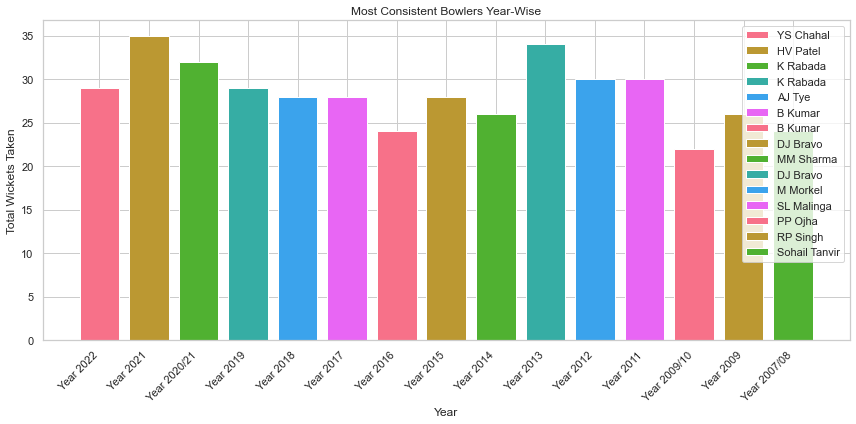

In [187]:
plt.figure(figsize=(12, 6))
for year, bowler in zip(years, consistent_bowlers_yearwise):
    plt.bar(f"Year {year}", bowler['total_wickets'], label=bowler['bowler'])

plt.title('Most Consistent Bowlers Year-Wise')
plt.xlabel('Year')
plt.ylabel('Total Wickets Taken')
plt.legend()
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Player data 

In [80]:
merged_data = match.merge(delivery, on='ID')

# DataFrame with the required columns
player_data = merged_data[['batter', 'batsman_run', 'bowler']]

# the total runs and total wickets for each player
summary_data = player_data.groupby('batter').agg({'batsman_run': 'sum', 'bowler': 'count'}).reset_index()

# Rename the columns 
summary_data.columns = ['Player', 'Runs', 'Wickets']
print(summary_data)

             Player  Runs  Wickets
0    A Ashish Reddy   280      196
1          A Badoni   161      139
2        A Chandila     4        7
3          A Chopra    53       75
4       A Choudhary    25       20
..              ...   ...      ...
600      Yash Dayal     0        1
601   Yashpal Singh    47       67
602     Younis Khan     3        7
603    Yuvraj Singh  2754     2207
604          Z Khan   117      141

[605 rows x 3 columns]


In [81]:
writer = pd.ExcelWriter('Player_data.xlsx', engine='xlsxwriter')
summary_data.to_excel(writer, sheet_name='PlayerData', index=False)
writer.save()
print("Excel file 'Player_data.xlsx' has been created.")

Excel file 'Player_data.xlsx' has been created.


## 11. Team which won most number of matches in 1 venue

Team with the Maximum Wins in a Venue:
       Venue           WinningTeam  wins
Eden Gardens Kolkata Knight Riders    45


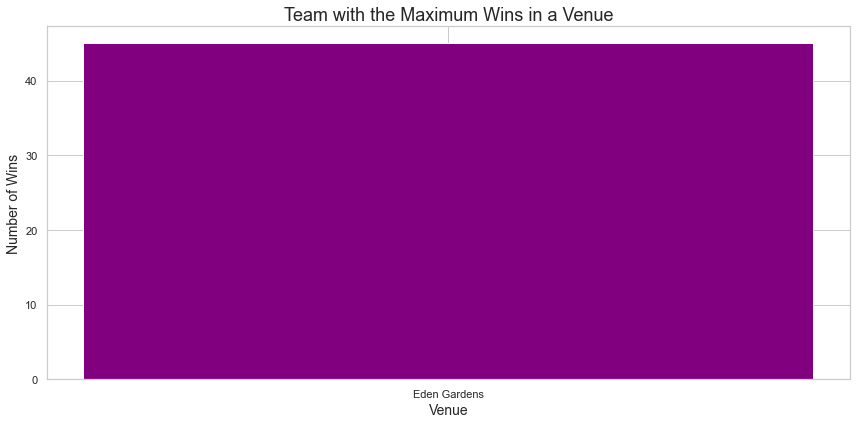

In [188]:
Team_wins = match.groupby(['Venue', 'WinningTeam']).size().reset_index(name='wins')
Teamwins_byvenue = Team_wins.groupby(['Venue', 'WinningTeam'])['wins'].max().reset_index()
team_with_max_wins = Teamwins_byvenue[Teamwins_byvenue['wins'] == Teamwins_byvenue['wins'].max()]

# team with the maximum wins in a venue
print("Team with the Maximum Wins in a Venue:")
print(team_with_max_wins[['Venue', 'WinningTeam', 'wins']].to_string(index=False))

#plot
plt.figure(figsize=(12, 6))
plt.bar(team_with_max_wins['Venue'], team_with_max_wins['wins'], color='purple')
plt.title('Team with the Maximum Wins in a Venue',fontsize=18)
plt.xlabel('Venue',fontsize=14)
plt.ylabel('Number of Wins',fontsize=14)
plt.tight_layout()
plt.show()

## 12. Every Team performance throughout the years

In [88]:
team_performance = {}
for index, row in match.iterrows():
    team1 = row["Team1"]
    team2 = row["Team2"]
    winner = row["WinningTeam"]

    if pd.notna(winner):
        if team1 not in team_performance:
            team_performance[team1] = {"Matches": 0, "Wins": 0, "RunsScored": 0, "WicketsTaken": 0}
        if team2 not in team_performance:
            team_performance[team2] = {"Matches": 0, "Wins": 0, "RunsScored": 0, "WicketsTaken": 0}
        team_performance[team1]["Matches"] += 1
        team_performance[team2]["Matches"] += 1
        team_performance[winner]["Wins"] += 1


# runs scored and wickets taken
for index, row in delivery.iterrows():
    batting_team = row["BattingTeam"]
    runs_scored = row["total_run"]
    is_wicket = row["isWicketDelivery"]

    if batting_team in team_performance:
        team_performance[batting_team]["RunsScored"] += runs_scored

    if is_wicket == 1 and batting_team in team_performance:
        team_performance[batting_team]["WicketsTaken"] += 1

# df from the team performance dictionary
team_performance_df = pd.DataFrame.from_dict(team_performance, orient="index")
print(team_performance_df)

                             Matches  Wins  RunsScored  WicketsTaken
Rajasthan Royals                 190    96       29681          1147
Gujarat Titans                    16    12        2663            82
Royal Challengers Bangalore      223   109       35190          1304
Lucknow Super Giants              15     9        2548            89
Sunrisers Hyderabad              152    75       23643           863
Punjab Kings                      28    13        4493           180
Delhi Capitals                    63    36       10145           372
Mumbai Indians                   231   131       36663          1383
Chennai Super Kings              208   121       33393          1089
Kolkata Knight Riders            223   114       34201          1318
Kings XI Punjab                  190    88       30064          1158
Delhi Daredevils                 159    67       24296           952
Rising Pune Supergiant            16    10        2470            90
Gujarat Lions                     

C:\Users\Hp\AppData\Local\Temp/ipykernel_10664/3802709770.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 0].set_xticklabels(team_performance_df.index, rotation=45, ha='right')
C:\Users\Hp\AppData\Local\Temp/ipykernel_10664/3802709770.py:13: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0, 1].set_xticklabels(team_performance_df.index, rotation=45, ha='right')
C:\Users\Hp\AppData\Local\Temp/ipykernel_10664/3802709770.py:19: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 0].set_xticklabels(team_performance_df.index, rotation=45, ha='right')
C:\Users\Hp\AppData\Local\Temp/ipykernel_10664/3802709770.py:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1, 1].set_xticklabels(team_performance_df.index, rotation=45, ha='right')


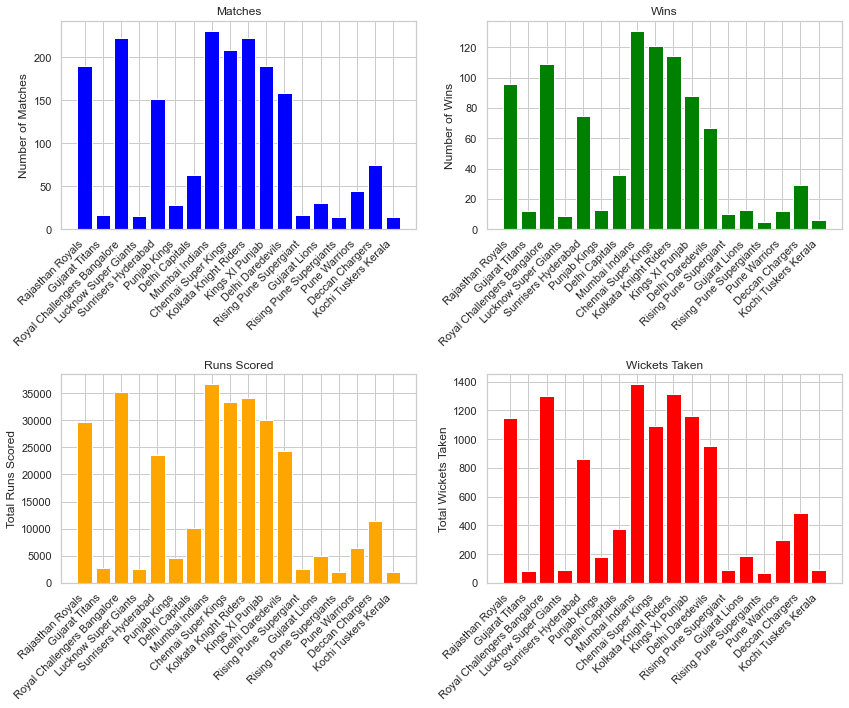

In [94]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Bar plot for Matches
axes[0, 0].bar(team_performance_df.index, team_performance_df['Matches'], color='blue')
axes[0, 0].set_title('Matches')
axes[0, 0].set_ylabel('Number of Matches')
axes[0, 0].set_xticklabels(team_performance_df.index, rotation=45, ha='right')

# Bar plot for Wins
axes[0, 1].bar(team_performance_df.index, team_performance_df['Wins'], color='green')
axes[0, 1].set_title('Wins')
axes[0, 1].set_ylabel('Number of Wins')
axes[0, 1].set_xticklabels(team_performance_df.index, rotation=45, ha='right')

# Bar plot for Runs Scored
axes[1, 0].bar(team_performance_df.index, team_performance_df['RunsScored'], color='orange')
axes[1, 0].set_title('Runs Scored')
axes[1, 0].set_ylabel('Total Runs Scored')
axes[1, 0].set_xticklabels(team_performance_df.index, rotation=45, ha='right')

# Bar plot for Wickets Taken
axes[1, 1].bar(team_performance_df.index, team_performance_df['WicketsTaken'], color='red')
axes[1, 1].set_title('Wickets Taken')
axes[1, 1].set_ylabel('Total Wickets Taken')
axes[1, 1].set_xticklabels(team_performance_df.index, rotation=45, ha='right')

# Adjust layout
plt.tight_layout()
plt.show()

## 13. Players with increasing performance throughout the years

In [191]:
merged_data = match.merge(delivery, on='ID')
players = merged_data['batter'].unique()
player_runs_years = {}

# Function to check if runs are increasing year by year
def has_increasing_runs(runs):
    return all(runs[i] < runs[i + 1] for i in range(len(runs) - 1))

for player in players:
    player_data = merged_data[merged_data['batter'] == player]
    yearly_runs = player_data.groupby('Season')['batsman_run'].sum()
    if len(yearly_runs) > 3 and has_increasing_runs(yearly_runs):
        years_played = ', '.join(yearly_runs.index.map(str))
        player_runs_years[player] = {'Total Runs': yearly_runs.sum(), 'Years Played': years_played}

# Sorting players by total runs in descending order
sorted_players = sorted(player_runs_years.items(), key=lambda x: x[1]['Total Runs'], reverse=True)

# top 5 players with increasing performance
print("Top 3 Players with Increasing Performance Throughout the Years:")
for i, (player, data) in enumerate(sorted_players[:3], start=1):
    print(f"{i}. Player: {player}, Years Played: {data['Years Played']}")

Top 3 Players with Increasing Performance Throughout the Years:
1. Player: Shubman Gill, Years Played: 2018, 2019, 2020/21, 2021, 2022
2. Player: SO Hetmyer, Years Played: 2019, 2020/21, 2021, 2022
3. Player: S Dube, Years Played: 2019, 2020/21, 2021, 2022


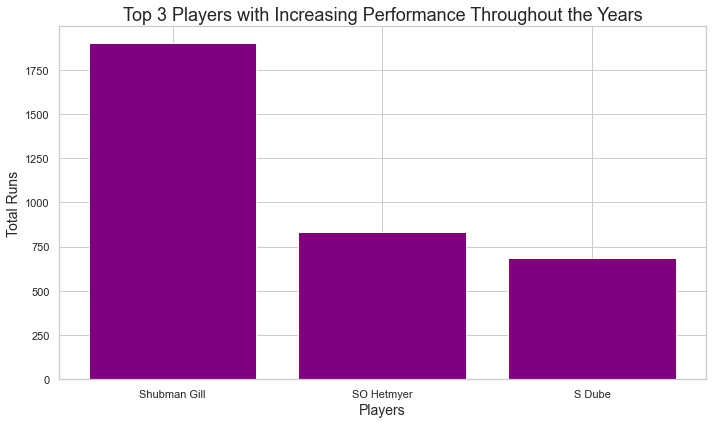

In [192]:
# Plot
top_3_players = sorted_players[:3]
player_names = [player[0] for player in top_3_players]
total_runs = [player[1]['Total Runs'] for player in top_3_players]
plt.figure(figsize=(10, 6))
plt.bar(player_names, total_runs, color='purple')
plt.title('Top 3 Players with Increasing Performance Throughout the Years',fontsize=18)
plt.xlabel('Players',fontsize=14)
plt.ylabel('Total Runs',fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 14. Players with declining performance throughout the years

In [193]:
merged_data = match.merge(delivery, on='ID')
player_runs_years = {}
# Function to check if runs are decreasing year by year
def has_decreasing_runs(runs):
    return all(runs[i] > runs[i + 1] for i in range(len(runs) - 1))

for player in players:    
    player_data = merged_data[merged_data['batter'] == player]
    yearly_runs = player_data.groupby('Season')['batsman_run'].sum()

    # Checking for decreasing runs and at least 4 years of play
    if len(yearly_runs) > 3 and has_decreasing_runs(yearly_runs):
        years_played = ', '.join(yearly_runs.index.map(str))
        player_runs_years[player] = {'Total Runs': yearly_runs.sum(), 'Years Played': years_played}

sorted_players = sorted(player_runs_years.items(), key=lambda x: x[1]['Total Runs'], reverse=True)
print("Top 3 Players with Decreasing Performance Throughout the Years:")
for i, (player, data) in enumerate(sorted_players[:3], start=1):
    print(f"{i}. Player: {player}, Years Played: {data['Years Played']}")

Top 3 Players with Decreasing Performance Throughout the Years:
1. Player: GC Smith, Years Played: 2007/08, 2009, 2009/10, 2011
2. Player: MV Boucher, Years Played: 2007/08, 2009, 2009/10, 2011
3. Player: WD Parnell, Years Played: 2011, 2012, 2013, 2014


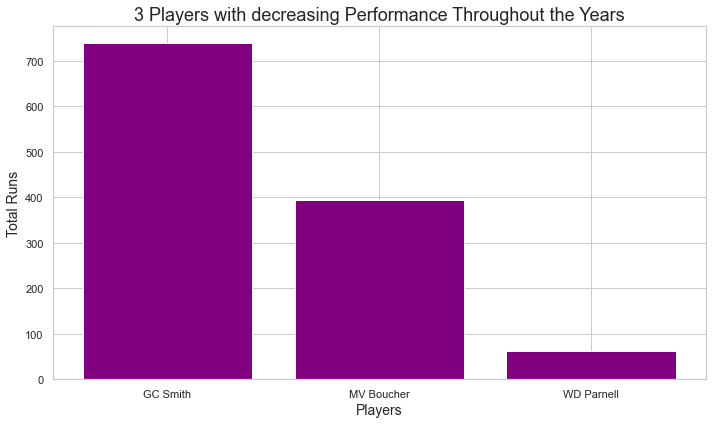

In [194]:
# Plot
top_3_players = sorted_players[:3]
player_names = [player[0] for player in top_3_players]
total_runs = [player[1]['Total Runs'] for player in top_3_players]
plt.figure(figsize=(10, 6))
plt.bar(player_names, total_runs, color='purple')
plt.title('3 Players with decreasing Performance Throughout the Years',fontsize=18)
plt.xlabel('Players',fontsize=14)
plt.ylabel('Total Runs',fontsize=14)
#plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 15. Year with most number of Power Play

In [195]:
power_play_overs = delivery[delivery['overs'].between(0, 5)]
merged_data = match.merge(power_play_overs, on='ID')
power_play_counts = merged_data['Season'].value_counts()

# year with the most Power Play overs
year_with_most_power_play = power_play_counts.idxmax()
most_power_play_count = power_play_counts.max()
print(f"Year with the most Power Play: {year_with_most_power_play}")
print(f"Number of Power Play overs: {most_power_play_count}")

Year with the most Power Play: 2013
Number of Power Play overs: 5692


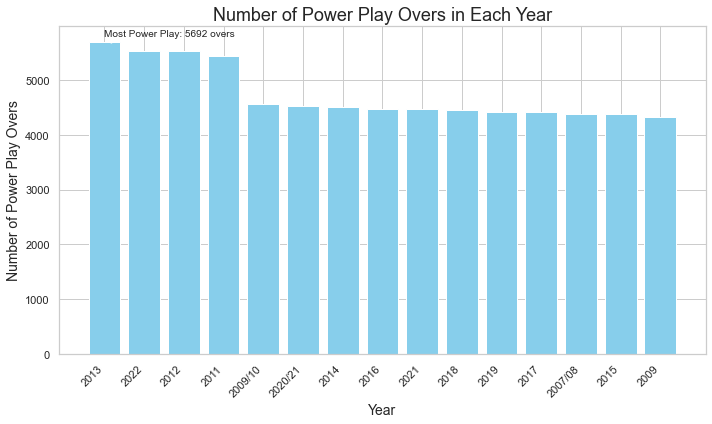

In [196]:
plt.figure(figsize=(10, 6))
plt.bar(power_play_counts.index, power_play_counts, color='skyblue')
plt.title('Number of Power Play Overs in Each Year',fontsize=18)
plt.xlabel('Year',fontsize=14)
plt.ylabel('Number of Power Play Overs',fontsize=14)

# Highlighting the year with the most Power Play overs
plt.annotate(f'Most Power Play: {most_power_play_count} overs', 
             xy=(year_with_most_power_play, most_power_play_count),
             xytext=(year_with_most_power_play, most_power_play_count + 100),
             arrowprops=dict(facecolor='red', arrowstyle='->'))

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## 16a. Top 10 Most number of boundaries and 6s by a player - overall

In [105]:
player_boundaries = delivery.groupby('batter').agg(
    {'batsman_run': ['sum', lambda x: (x == 4).sum(), lambda x: (x == 6).sum()]})
player_boundaries.columns = ['TotalRuns', '4s', '6s']
top_10_scorers = player_boundaries.sort_values(by='TotalRuns', ascending=False).head(10)

# top 10 players with the most boundaries
print("Top 10 Players with the Most Boundaries and 6s:")
print(top_10_scorers)

Top 10 Players with the Most Boundaries and 6s:
                TotalRuns   4s   6s
batter                             
V Kohli              6634  581  219
S Dhawan             6244  701  137
DA Warner            5883  577  216
RG Sharma            5881  519  241
SK Raina             5536  506  204
AB de Villiers       5181  414  253
CH Gayle             4997  408  359
MS Dhoni             4978  346  229
RV Uthappa           4954  481  182
KD Karthik           4377  426  134


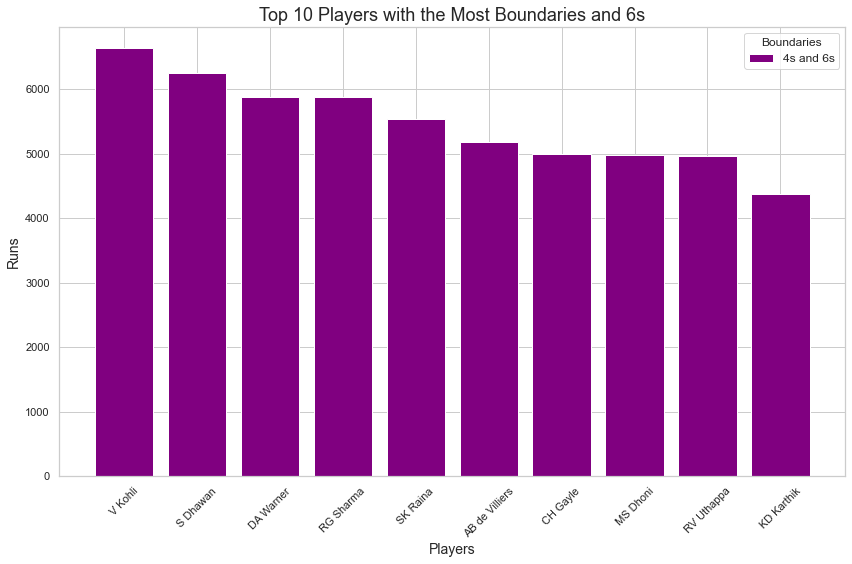

In [109]:
fig, ax = plt.subplots(figsize=(12, 8))

# Bar for 4s and 6s combined
ax.bar(top_10_scorers.index, top_10_scorers['TotalRuns'], label='4s and 6s', color='purple')

ax.set_title('Top 10 Players with the Most Boundaries and 6s', fontsize=18)
ax.set_xlabel('Players', fontsize=14)
ax.set_ylabel('Runs', fontsize=14)
ax.legend(title='Boundaries', fontsize=12)
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

## 16b. Top 10 Most number of boundaries and 6s by a player - yearwise

In [111]:
merged_data = match.merge(delivery, on='ID')

player_boundaries_yearwise = merged_data.groupby(['batter', 'Season']).agg(
    {'batsman_run': ['sum', lambda x: (x == 4).sum(), lambda x: (x == 6).sum()]})
player_boundaries_yearwise.columns = ['TotalRuns', '4s', '6s']
player_boundaries_yearwise = player_boundaries_yearwise.reset_index()
unique_seasons = player_boundaries_yearwise['Season'].unique()

# top 10 players with the most boundaries and 6s for each season
for season in unique_seasons:
    season_data = player_boundaries_yearwise[player_boundaries_yearwise['Season'] == season]
    top_10_boundary_scorers_season = season_data.sort_values(by=['4s', '6s'], ascending=False).head(10)
    
    print(f"Top 10 Players with the Most Boundaries and 6s in {season}:")
    print(top_10_boundary_scorers_season)
    print()

Top 10 Players with the Most Boundaries and 6s in 2012:
             batter Season  TotalRuns  4s  6s
169       AM Rahane   2012        560  73  10
615       G Gambhir   2012        590  64  17
1539       R Dravid   2012        462  63   4
1734       S Dhawan   2012        569  58  18
2143       V Sehwag   2012        495  57  19
1288  Mandeep Singh   2012        432  53   7
374        CH Gayle   2012        733  46  59
410        CL White   2012        479  41  20
1620      RG Sharma   2012        433  39  18
1110        M Vijay   2012        336  39  10

Top 10 Players with the Most Boundaries and 6s in 2013:
          batter Season  TotalRuns  4s  6s
1160  MEK Hussey   2013        733  81  17
2128     V Kohli   2013        639  65  22
1540    R Dravid   2013        471  64   5
1940   SR Watson   2013        543  59  22
375     CH Gayle   2013        720  57  52
141     AJ Finch   2013        456  54  16
913   KD Karthik   2013        510  54  14
616    G Gambhir   2013        406  5

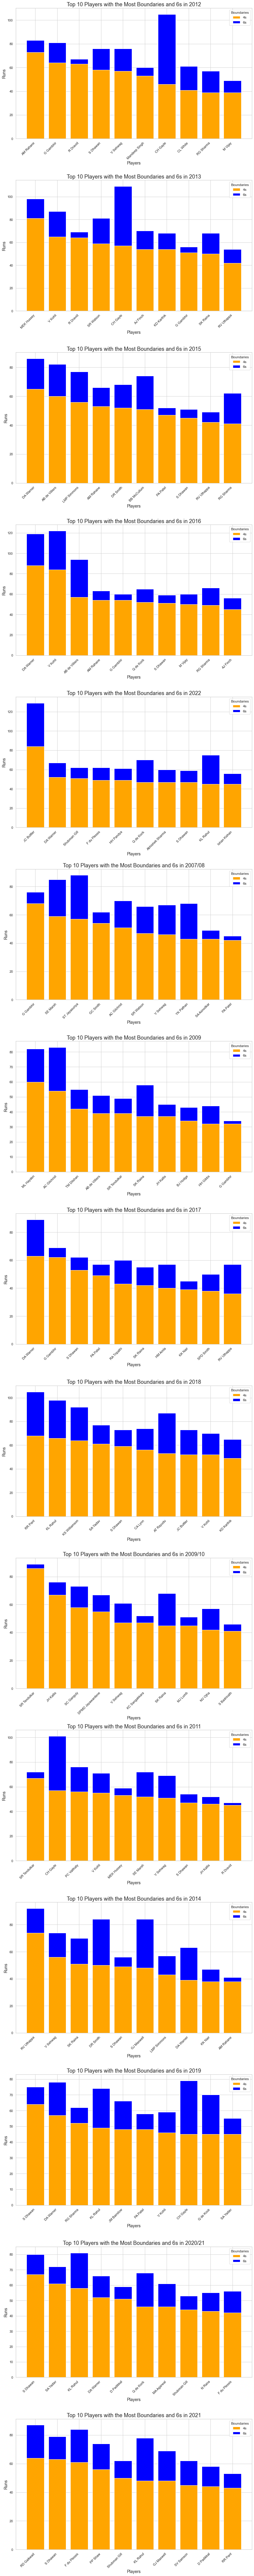

In [115]:
fig, axs = plt.subplots(nrows=len(unique_seasons), figsize=(12, 8 * len(unique_seasons)))

for i, season in enumerate(unique_seasons):
    season_data = player_boundaries_yearwise[player_boundaries_yearwise['Season'] == season]
    top_10_boundary_scorers_season = season_data.sort_values(by=['4s', '6s'], ascending=False).head(10)

    # Bar plot for each season
    axs[i].bar(top_10_boundary_scorers_season['batter'], top_10_boundary_scorers_season['4s'], label='4s', color='orange')
    axs[i].bar(top_10_boundary_scorers_season['batter'], top_10_boundary_scorers_season['6s'], bottom=top_10_boundary_scorers_season['4s'], label='6s', color='blue')

    axs[i].set_title(f'Top 10 Players with the Most Boundaries and 6s in {season}', fontsize=18)
    axs[i].set_ylabel('Runs', fontsize=14)
    axs[i].legend(title='Boundaries', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_xticks(range(len(top_10_boundary_scorers_season['batter'])))
    axs[i].set_xticklabels(top_10_boundary_scorers_season['batter'], rotation=45, ha='right')
    axs[i].set_xlabel('Players', fontsize=14)

plt.tight_layout()
plt.show()


## 17a.  Top 5 Most number of boundaries and 6s by a Team - overall

In [117]:
merged_data = match.merge(delivery, on='ID')
team_boundaries = merged_data.groupby('BattingTeam').agg(
    {'batsman_run': [lambda x: (x == 4).sum(), lambda x: (x == 6).sum()]})
team_boundaries.columns = ['4s', '6s']
top_5_teams_boundaries = team_boundaries.sort_values(by='4s', ascending=False).head(5)

# top 5 teams with the most boundaries and 6s
print("Top 5 Teams with the Most Boundaries and 6s:")
print(top_5_teams_boundaries)

Top 5 Teams with the Most Boundaries and 6s:
                               4s    6s
BattingTeam                            
Mumbai Indians               3157  1412
Kolkata Knight Riders        3021  1229
Royal Challengers Bangalore  2947  1381
Chennai Super Kings          2790  1269
Rajasthan Royals             2640  1013


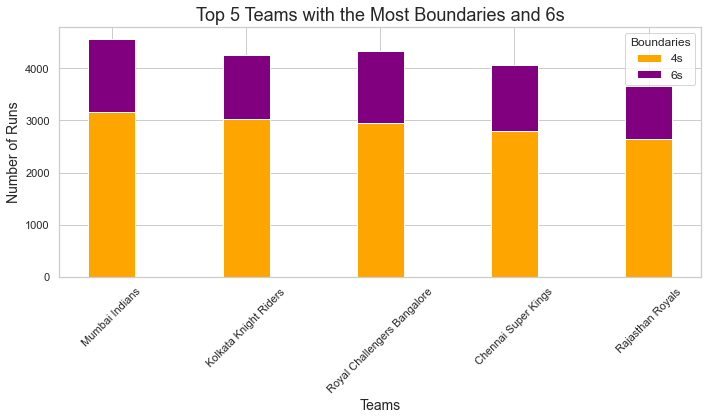

In [119]:
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for 4s and 6s for each team
width = 0.35
bar1 = ax.bar(top_5_teams_boundaries.index, top_5_teams_boundaries['4s'], width, label='4s', color='orange')
bar2 = ax.bar(top_5_teams_boundaries.index, top_5_teams_boundaries['6s'], width, label='6s', bottom=top_5_teams_boundaries['4s'], color='purple')

ax.set_ylabel('Number of Runs', fontsize=14)
ax.set_title('Top 5 Teams with the Most Boundaries and 6s', fontsize=18)
ax.legend(title='Boundaries', fontsize=12)
ax.tick_params(axis='x', rotation=45)
ax.set_xlabel('Teams', fontsize=14)

plt.tight_layout()
plt.show()

## 17b. Top 5 Most number of boundaries and 6s by a Team - yearwise

In [126]:
merged_data = match.merge(delivery, on='ID')
team_boundaries_yearwise = merged_data.groupby(['Season', 'BattingTeam']).agg(
    {'batsman_run': [lambda x: (x == 4).sum(), lambda x: (x == 6).sum()]})
team_boundaries_yearwise.columns = ['4s', '6s']
team_boundaries_yearwise = team_boundaries_yearwise.reset_index()
team_boundaries_yearwise['TotalBoundaries'] = team_boundaries_yearwise['4s'] + team_boundaries_yearwise['6s']

top_5_teams_boundaries_yearwise = team_boundaries_yearwise.groupby('Season', group_keys=False).apply(
    lambda x: x.nlargest(5, 'TotalBoundaries')).reset_index(drop=True)

unique_seasons = team_boundaries_yearwise['Season'].unique()

# top 5 teams with the most boundaries and 6s yearwise
for year, data in top_5_teams_boundaries_yearwise.groupby('Season'):
    print(f"Top 5 Teams with the Most Boundaries and 6s in {year}:")
    print(data[['BattingTeam', '4s', '6s']])
    print()

Top 5 Teams with the Most Boundaries and 6s in 2007/08:
           BattingTeam   4s  6s
0     Rajasthan Royals  259  85
1  Chennai Super Kings  244  86
2      Kings XI Punjab  231  95
3      Deccan Chargers  205  92
4       Mumbai Indians  197  76

Top 5 Teams with the Most Boundaries and 6s in 2009:
                   BattingTeam   4s  6s
5              Deccan Chargers  173  99
6          Chennai Super Kings  192  73
7  Royal Challengers Bangalore  192  67
8             Delhi Daredevils  188  51
9              Kings XI Punjab  140  61

Top 5 Teams with the Most Boundaries and 6s in 2009/10:
                    BattingTeam   4s  6s
10               Mumbai Indians  261  75
11          Chennai Super Kings  212  98
12              Kings XI Punjab  234  58
13  Royal Challengers Bangalore  214  77
14              Deccan Chargers  197  84

Top 5 Teams with the Most Boundaries and 6s in 2011:
                    BattingTeam   4s  6s
15  Royal Challengers Bangalore  225  94
16          Chennai

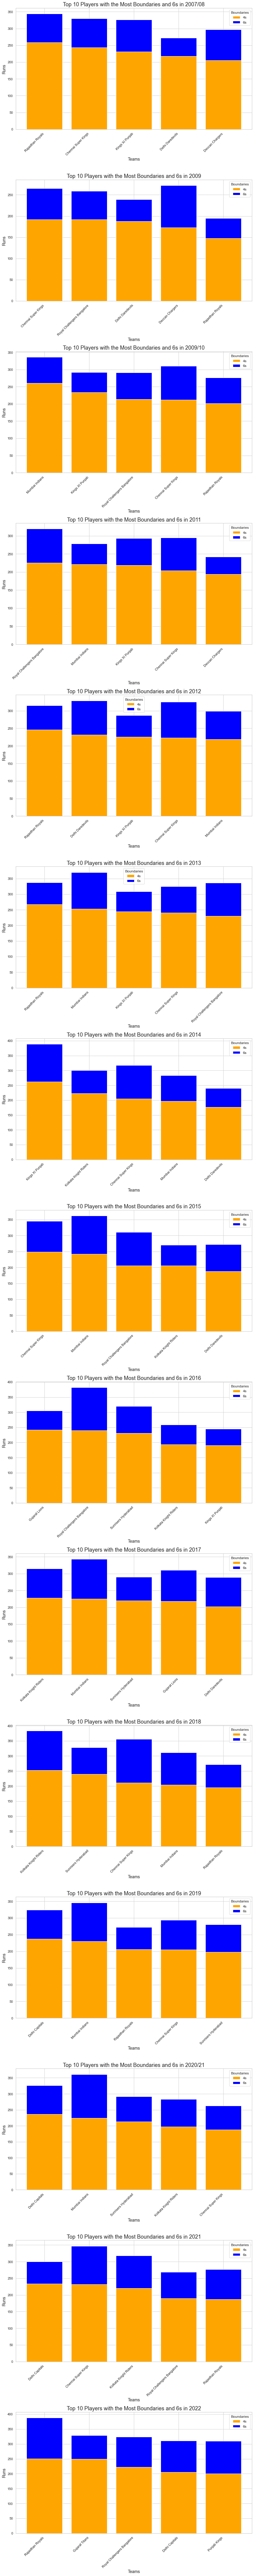

In [130]:
fig, axs = plt.subplots(nrows=len(unique_seasons), figsize=(12, 8 * len(unique_seasons)))

for i, season in enumerate(unique_seasons):
    season_data = team_boundaries_yearwise[team_boundaries_yearwise['Season'] == season]
    top_5_team_season = season_data.sort_values(by=['4s', '6s'], ascending=False).head(5)

    # Bar plot for each season
    axs[i].bar(top_5_team_season['BattingTeam'], top_5_team_season['4s'], label='4s', color='orange')
    axs[i].bar(top_5_team_season['BattingTeam'], top_5_team_season['6s'], bottom=top_5_team_season['4s'], label='6s', color='blue')

    axs[i].set_title(f'Top 10 Players with the Most Boundaries and 6s in {season}', fontsize=18)
    axs[i].set_ylabel('Runs', fontsize=14)
    axs[i].legend(title='Boundaries', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)
    axs[i].set_xticks(range(len(top_5_team_season['BattingTeam'])))
    axs[i].set_xticklabels(top_5_team_season['BattingTeam'], rotation=45, ha='right')
    axs[i].set_xlabel('Teams', fontsize=14)
plt.tight_layout()
plt.show()

## 18a. Top 5 players with highest partnership  - overall

In [17]:
partnership_data = delivery[(delivery['batsman_run'] > 0) | (delivery['extras_run'] > 0)]
partnership_runs = partnership_data.groupby(['batter', 'non-striker'])['total_run'].sum().reset_index()

# top 5 partnerships
top_5_partnerships = partnership_runs.sort_values(by='total_run', ascending=False).head(5)
print("Top 5 Players with the Highest Partnerships:")
print(top_5_partnerships)

Top 5 Players with the Highest Partnerships:
              batter     non-striker  total_run
265   AB de Villiers         V Kohli       1623
1192        CH Gayle         V Kohli       1617
6979         V Kohli  AB de Villiers       1511
1470       DA Warner        S Dhawan       1420
6987         V Kohli        CH Gayle       1185


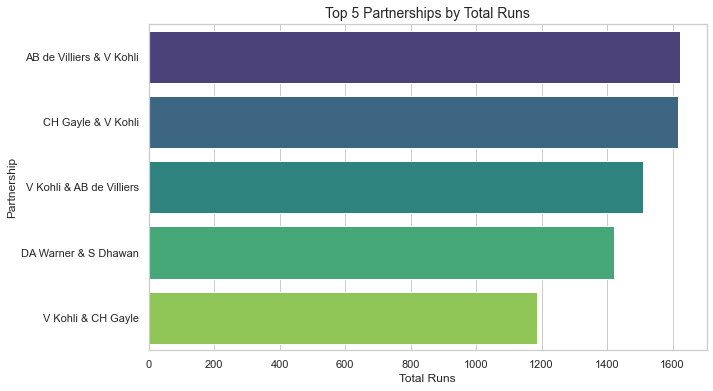

In [145]:
partnership_runs['partnership'] = partnership_runs['batter'] + ' & ' + partnership_runs['non-striker']

# top 5 partnerships
top_5_partnerships = partnership_runs.sort_values(by='total_run', ascending=False).head(5)
plt.figure(figsize=(10, 6))
sns.barplot(x='total_run', y='partnership', data=top_5_partnerships, palette="viridis")
plt.xlabel('Total Runs', fontsize=12)
plt.ylabel('Partnership', fontsize=12)
plt.title('Top 5 Partnerships by Total Runs', fontsize=14)
plt.show()

## 18b. Top 5 players with highest partnership  - yearwise

In [19]:
merged_data = match.merge(delivery, on='ID')
partnership_data = merged_data[(merged_data['batsman_run'] > 0) | (merged_data['extras_run'] > 0)]
partnership_runs_yearwise = (
    partnership_data.groupby(['Season', 'batter', 'non-striker'])
    ['total_run'].sum().reset_index()
)
unique_seasons = partnership_runs_yearwise['Season'].unique()

# top 5 partnerships for each year
top_5_partnerships_yearwise = (
    partnership_runs_yearwise
    .sort_values(by=['Season', 'total_run'], ascending=[True, False])
    .groupby('Season')
    .head(5)
)

for year, data in top_5_partnerships_yearwise.groupby('Season'):
    print(f"Top 5 Players with highest partnership in {year}:")
    print(data[['batter', 'non-striker', 'total_run']])
    print()

Top 5 Players with highest partnership in 2007/08:
            batter   non-striker  total_run
644       V Sehwag     G Gambhir        287
590  ST Jayasuriya  SR Tendulkar        284
149      G Gambhir      S Dhawan        267
464       S Dhawan     G Gambhir        246
151      G Gambhir      V Sehwag        242

Top 5 Players with highest partnership in 2009:
              batter   non-striker  total_run
769     AC Gilchrist      HH Gibbs        294
1275        SK Raina      MS Dhoni        183
765   AB de Villiers    TM Dilshan        180
897         HH Gibbs  AC Gilchrist        179
1068       ML Hayden      MS Dhoni        168

Top 5 Players with highest partnership in 2009/10:
         batter non-striker  total_run
1775    MJ Lumb     NV Ojha        265
1660  JH Kallis   MK Pandey        228
1777  MK Pandey   JH Kallis        219
2042  SS Tiwary   AT Rayudu        217
1760    M Vijay    SK Raina        192

Top 5 Players with highest partnership in 2011:
            batter   non-

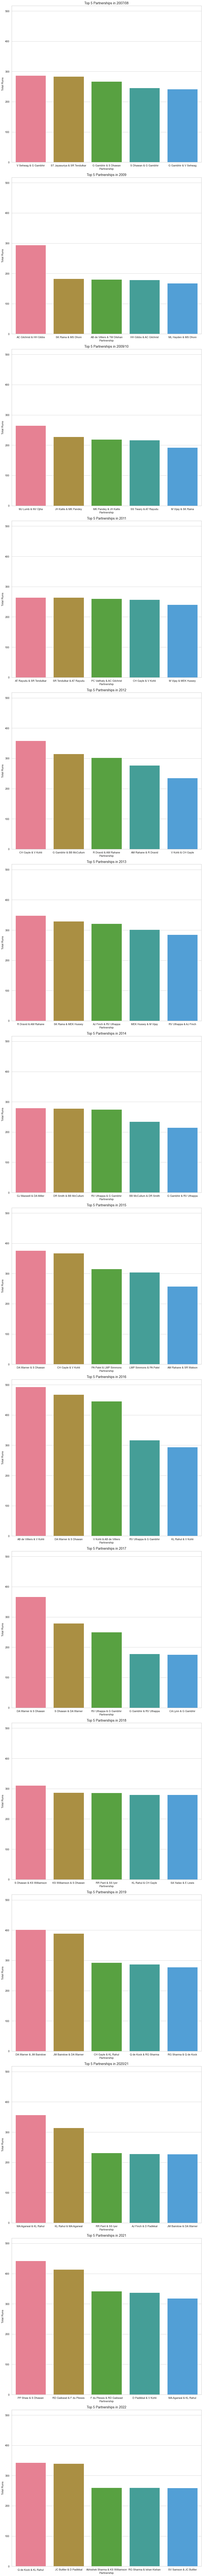

In [143]:
fig, axes = plt.subplots(nrows=len(unique_seasons), figsize=(12, 10*len(unique_seasons)), sharey=True)
sns.set_palette("husl")

for ax, (year, data) in zip(axes, top_5_partnerships_yearwise.groupby('Season')):
    data['partnership'] = data['batter'] + ' & ' + data['non-striker']    
    sns.barplot(y='total_run', x='partnership', data=data, ax=ax)
    ax.set_ylabel('Total Runs', fontsize=12)
    ax.set_xlabel('Partnership', fontsize=12)
    ax.set_title(f'Top 5 Partnerships in {year}', fontsize=14)

plt.tight_layout()
plt.show()

## 19a. Top 5 players with most wickets in powerplay - overall

In [146]:
merged_data = match.merge(delivery, on='ID')
powerplay_data = merged_data[(merged_data['overs'] >= 0) & (merged_data['overs'] <= 5)]
powerplay_wickets = powerplay_data[merged_data['isWicketDelivery'] == 1].groupby('bowler')['isWicketDelivery'].count().reset_index()
powerplay_wickets.columns = ['Bowler', 'Wickets']
top_5_powerplay_wicket_takers = powerplay_wickets.sort_values(by='Wickets', ascending=False).head(5)

print("Top 5 Players with the Most Wickets in Powerplay:")
print(top_5_powerplay_wicket_takers)

Top 5 Players with the Most Wickets in Powerplay:
             Bowler  Wickets
37          B Kumar       60
281          Z Khan       58
250  Sandeep Sharma       56
265        UT Yadav       55
196        R Ashwin       50


C:\Users\Hp\AppData\Local\Temp/ipykernel_10664/192581614.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  powerplay_wickets = powerplay_data[merged_data['isWicketDelivery'] == 1].groupby('bowler')['isWicketDelivery'].count().reset_index()


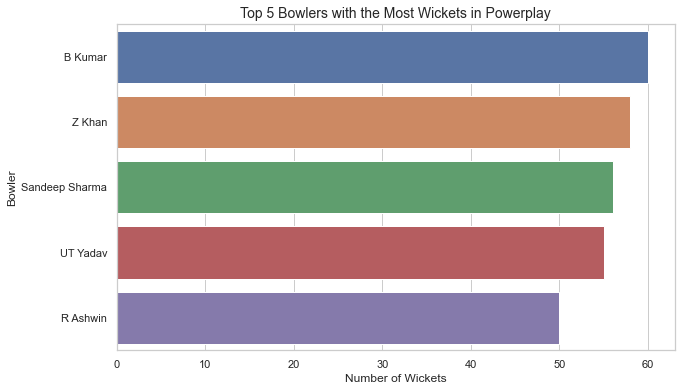

In [147]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Wickets', y='Bowler', data=top_5_powerplay_wicket_takers, palette="deep")
plt.xlabel('Number of Wickets', fontsize=12)
plt.ylabel('Bowler', fontsize=12)
plt.title('Top 5 Bowlers with the Most Wickets in Powerplay', fontsize=14)
plt.show()

## 19b. Top 5 players with most wickets in powerplay - yearwise

In [16]:
merged_data = match.merge(delivery, on='ID')
powerplay_data = merged_data[(merged_data['overs'] >= 0) & (merged_data['overs'] <= 5)]
powerplay_wickets_yearwise = (powerplay_data[powerplay_data['isWicketDelivery'] == 1].groupby(['Season', 'bowler'])
    .size()
    .reset_index(name='Wickets'))

# top 5 wicket-takers in powerplay for each year
top5_powerplay_wickets_yearwise = (powerplay_wickets_yearwise.sort_values(by=['Season', 'Wickets'], ascending=[True, False])
    .groupby('Season')
    .head(5))

# Print the result
for year, data in top5_powerplay_wickets_yearwise.groupby('Season'):
    print(f"Top 5 Players with the Most wickets in powerplay in {year}:")
    print(data[['bowler', 'Wickets']])
    print()

Top 5 Players with the Most wickets in powerplay in 2007/08:
         bowler  Wickets
21      MS Gony       13
27  S Sreesanth       13
12   GD McGrath        9
31   SM Pollock        9
32    SR Watson        9

Top 5 Players with the Most wickets in powerplay in 2009:
       bowler  Wickets
62  JA Morkel       11
80   RP Singh       11
44    A Nehra        9
55  DP Nannes        9
54   DJ Bravo        8

Top 5 Players with the Most wickets in powerplay in 2009/10:
           bowler  Wickets
156    WPUJC Vaas        9
131   MF Maharoof        8
138      R Ashwin        8
117      DW Steyn        7
113  DE Bollinger        6

Top 5 Players with the Most wickets in powerplay in 2011:
            bowler  Wickets
201       R Ashwin       12
179       I Sharma       11
195       MM Patel       10
181  Iqbal Abdulla        9
207       RP Singh        8

Top 5 Players with the Most wickets in powerplay in 2012:
            bowler  Wickets
252       M Morkel       11
254       MM Patel        

C:\Users\Hp\anaconda3\lib\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


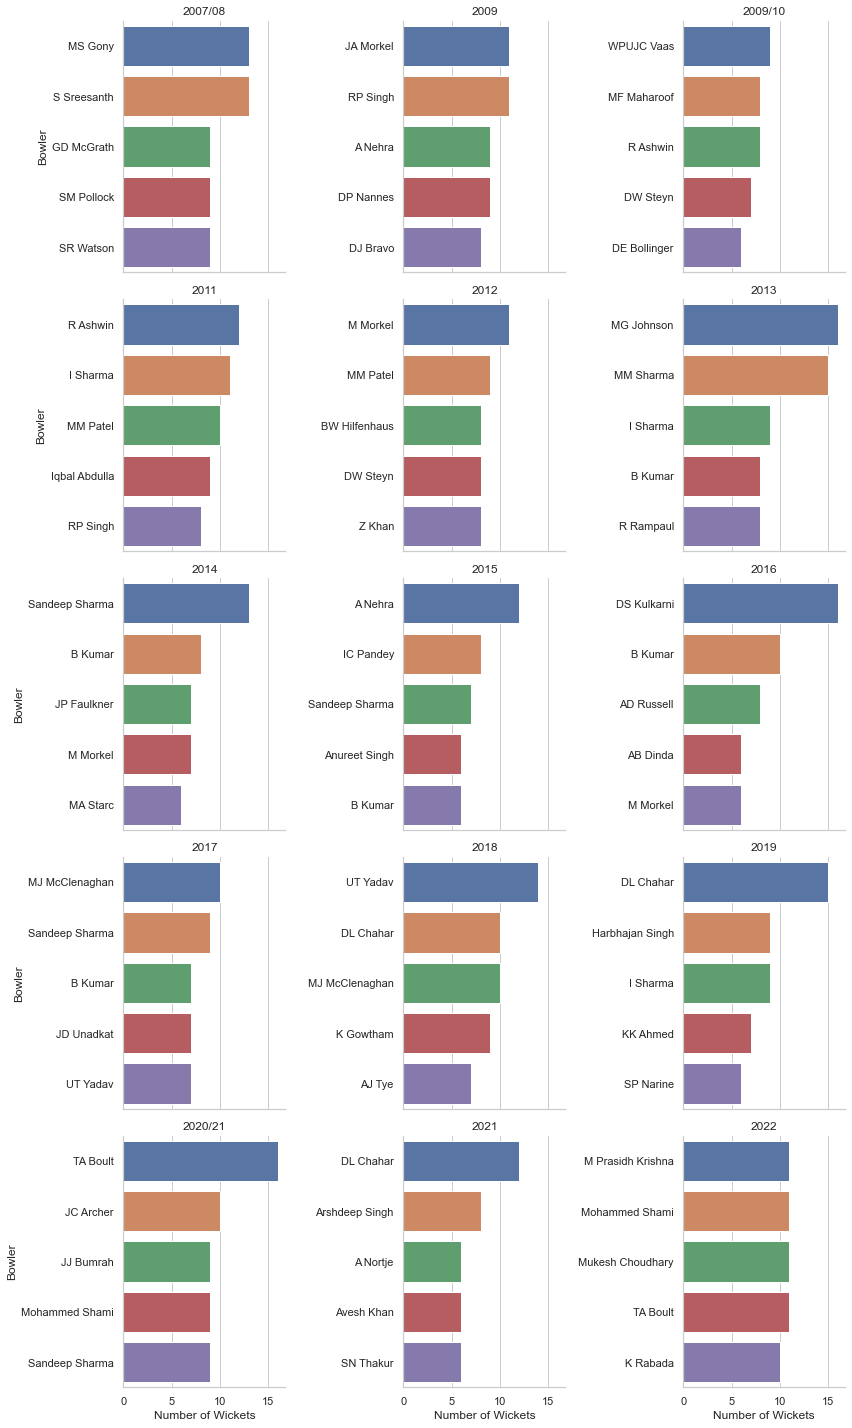

In [148]:
g = sns.FacetGrid(top5_powerplay_wickets_yearwise, col='Season', col_wrap=3, height=4, sharey=False)
g.map(sns.barplot, 'Wickets', 'bowler', palette="deep")
g.set_axis_labels("Number of Wickets", "Bowler")
g.set_titles(col_template="{col_name}", fontsize=14)
plt.show()

## 20a. Top 5 players with most number of MOM (Man of the Match) - overall

Top 5 Players with the Most Man of the Match Awards:
AB de Villiers    25
CH Gayle          22
DA Warner         18
RG Sharma         18
MS Dhoni          17
Name: Player_of_Match, dtype: int64


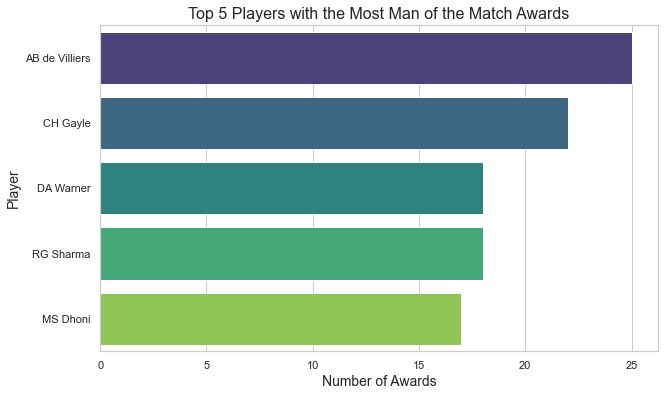

In [149]:
top_MOM_players = match['Player_of_Match'].value_counts().head(5)

# top 5 players with the most MOM awards
print("Top 5 Players with the Most Man of the Match Awards:")
print(top_MOM_players)

#plot
plt.figure(figsize=(10, 6))
sns.barplot(x=top_MOM_players.values, y=top_MOM_players.index, palette="viridis")
plt.title('Top 5 Players with the Most Man of the Match Awards', fontsize=16)
plt.xlabel('Number of Awards', fontsize=14)
plt.ylabel('Player', fontsize=14)
plt.show()

## 20b. Top 5 players with most number of MOM (Man of the Match) - yearwise

In [151]:
top_mom_players_yearwise = match.groupby(['Season', 'Player_of_Match'])['ID'].count().reset_index()
top_mom_players_yearwise.columns = ['Season', 'Player', 'MOM_Awards']
top_mom_players_yearwise_list = []

unique_years = top_mom_players_yearwise['Season'].unique()
for year in unique_years:
    year_data = top_mom_players_yearwise[top_mom_players_yearwise['Season'] == year]
    top_players = year_data.nlargest(5, 'MOM_Awards')
    top_mom_players_yearwise_list.append(top_players)

# top 5 players with the most MOM awards yearwise
for top_players in top_mom_players_yearwise_list:
    year = top_players.iloc[0]['Season']
    print(f"Top 5 Players with the Most Man of the Match Awards in {year}:")
    print(top_players[['Player', 'MOM_Awards']])
    print()

Top 5 Players with the Most Man of the Match Awards in 2007/08:
          Player  MOM_Awards
28      SE Marsh           5
33     SR Watson           4
39     YK Pathan           4
3   AC Gilchrist           2
17       M Ntini           2

Top 5 Players with the Most Man of the Match Awards in 2009:
              Player  MOM_Awards
80         YK Pathan           3
44    AB de Villiers           2
45      AC Gilchrist           2
51  DPMD Jayawardene           2
57         JH Kallis           2

Top 5 Players with the Most Man of the Match Awards in 2009/10:
           Player  MOM_Awards
121  SR Tendulkar           4
83      A Symonds           3
96      JH Kallis           3
91      G Gambhir           2
97     KA Pollard           2

Top 5 Players with the Most Man of the Match Awards in 2011:
          Player  MOM_Awards
133     CH Gayle           6
152   MEK Hussey           3
126     A Mishra           2
131  BB McCullum           2
132     BJ Hodge           2

Top 5 Players with t

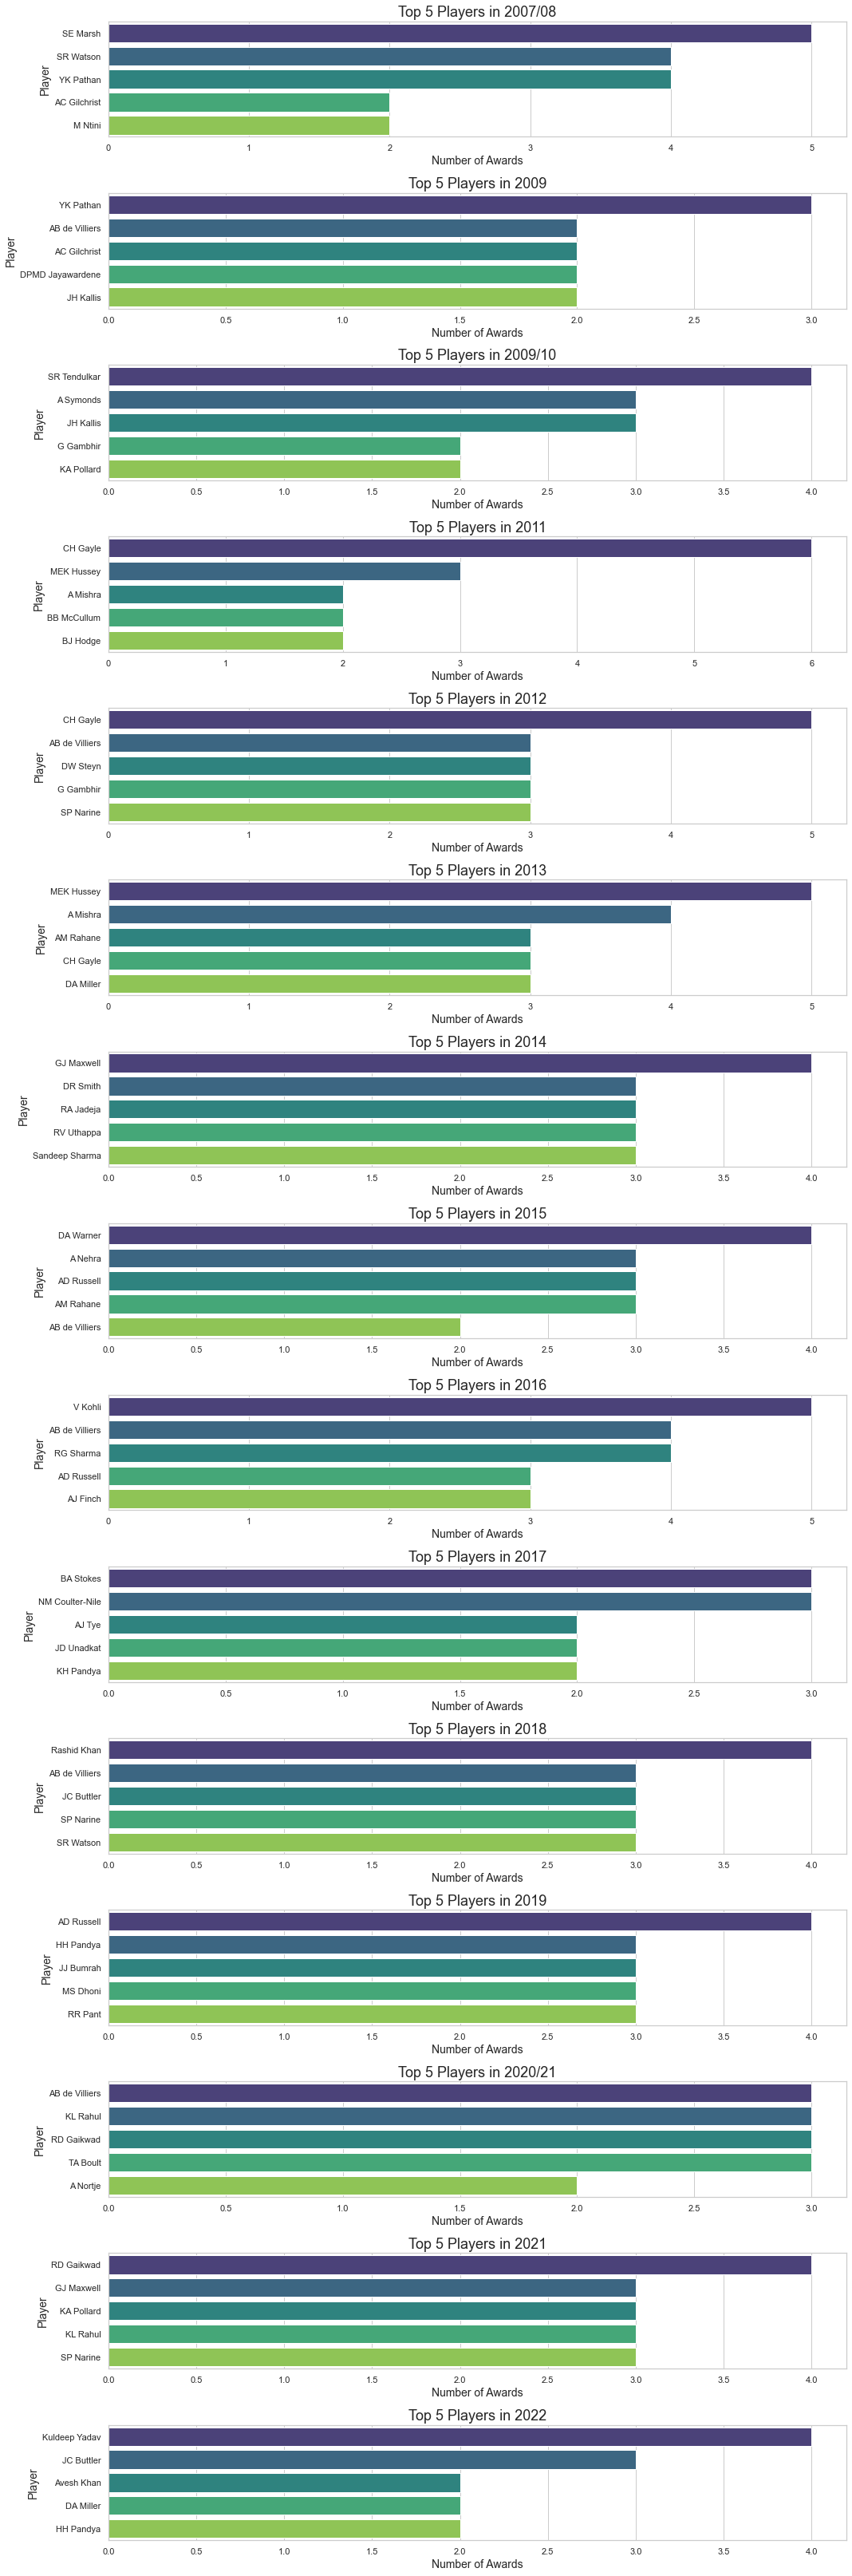

In [161]:
num_subplots = len(top_mom_players_yearwise_list)

# Plotting
plt.figure(figsize=(15, 3 * num_subplots))

for i, top_players in enumerate(top_mom_players_yearwise_list, start=1):
    plt.subplot(num_subplots, 1, i)
    sns.barplot(x='MOM_Awards', y='Player', data=top_players, palette='viridis')
    plt.title(f'Top 5 Players in {top_players.iloc[0]["Season"]}',fontsize=18)
    plt.xlabel('Number of Awards',fontsize=14)
    plt.ylabel('Player',fontsize=14)

plt.tight_layout()
plt.show()

## 22a.  Top 3 venues with most matches played - overall

In [154]:
venue_counts = match['Venue'].value_counts().reset_index()
venue_counts.columns = ['Venue', 'MatchesPlayed']
sorted_venues = venue_counts.sort_values(by='MatchesPlayed', ascending=False)
top_3_venues = sorted_venues.head(3)

# top 3 venues with the most matches played
print("Top 3 Venues with the Most Matches Played:")
print(top_3_venues)

Top 3 Venues with the Most Matches Played:
                   Venue  MatchesPlayed
0           Eden Gardens             77
1       Wankhede Stadium             73
2  M Chinnaswamy Stadium             65


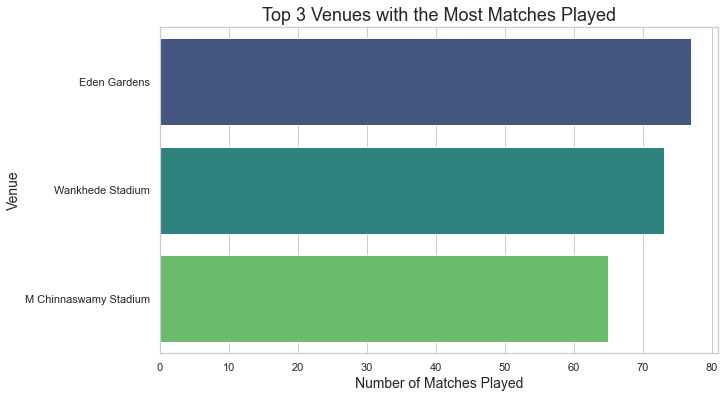

In [156]:
plt.figure(figsize=(10, 6))
sns.barplot(x='MatchesPlayed', y='Venue', data=top_3_venues, palette='viridis')
plt.title('Top 3 Venues with the Most Matches Played',fontsize=18)
plt.xlabel('Number of Matches Played',fontsize=14)
plt.ylabel('Venue',fontsize=14)
plt.show()

## 22b.  Top 3 venues with most matches played -yearwise

In [158]:
yearwise_venue_counts = match.groupby(['Season', 'Venue'])['MatchNumber'].count().reset_index()
yearwise_venue_counts.columns = ['Season', 'Venue', 'MatchesPlayed']

def top_3_venues_by_year(year):
    year_data = yearwise_venue_counts[yearwise_venue_counts['Season'] == year]
    return year_data.nlargest(3, 'MatchesPlayed')

unique_years = yearwise_venue_counts['Season'].unique()

# top 3 venues with the most matches played 
for year in unique_years:
    top_venues = top_3_venues_by_year(year)
    print(f"Top 3 Venues with the Most Matches Played in {year}:")
    print(top_venues)
    print()

Top 3 Venues with the Most Matches Played in 2007/08:
    Season                            Venue  MatchesPlayed
1  2007/08                     Eden Gardens              7
3  2007/08            M Chinnaswamy Stadium              7
4  2007/08  MA Chidambaram Stadium, Chepauk              7

Top 3 Venues with the Most Matches Played in 2009:
   Season                  Venue  MatchesPlayed
11   2009              Kingsmead             15
16   2009        SuperSport Park             12
12   2009  New Wanderers Stadium              8

Top 3 Venues with the Most Matches Played in 2009/10:
     Season                  Venue  MatchesPlayed
21  2009/10           Eden Gardens              7
22  2009/10       Feroz Shah Kotla              7
24  2009/10  M Chinnaswamy Stadium              7

Top 3 Venues with the Most Matches Played in 2011:
   Season                            Venue  MatchesPlayed
36   2011  MA Chidambaram Stadium, Chepauk              9
41   2011                 Wankhede Stadium 

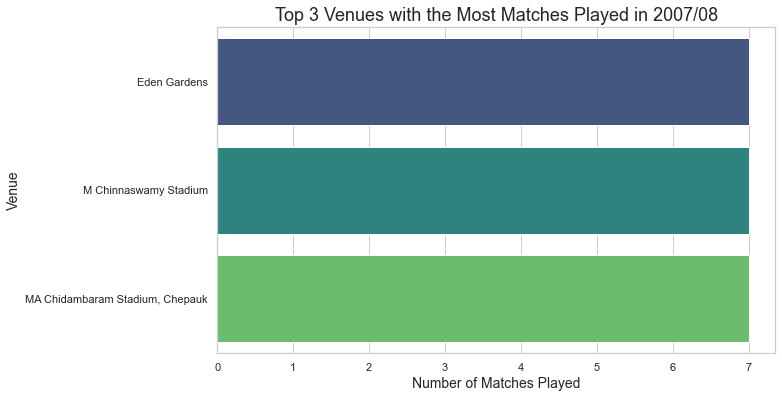

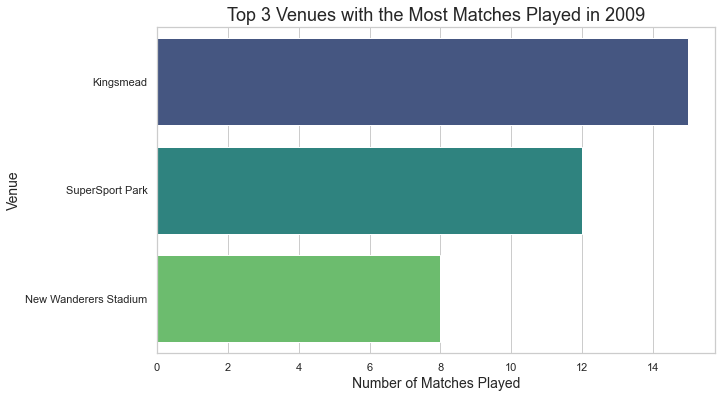

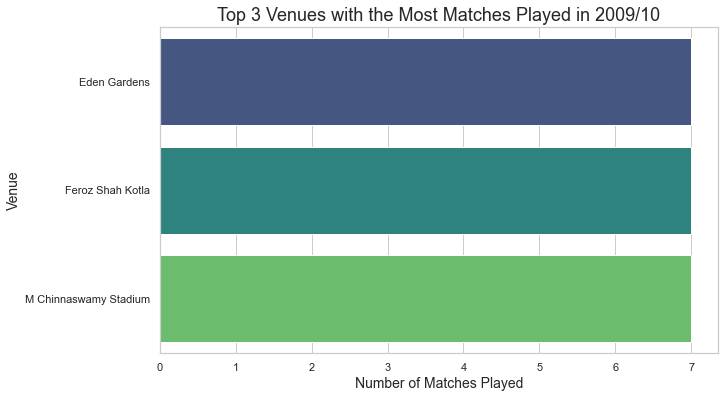

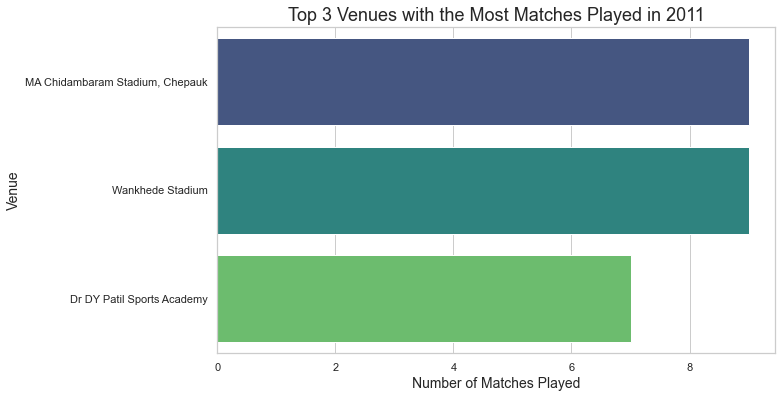

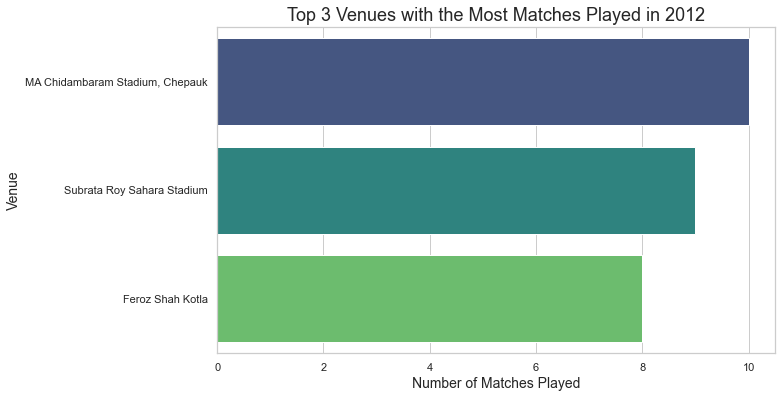

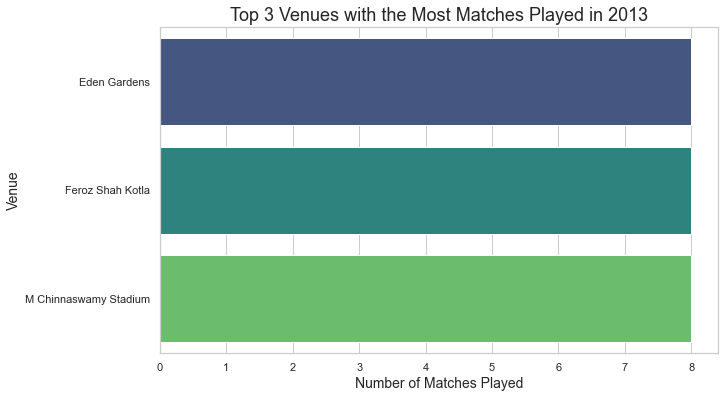

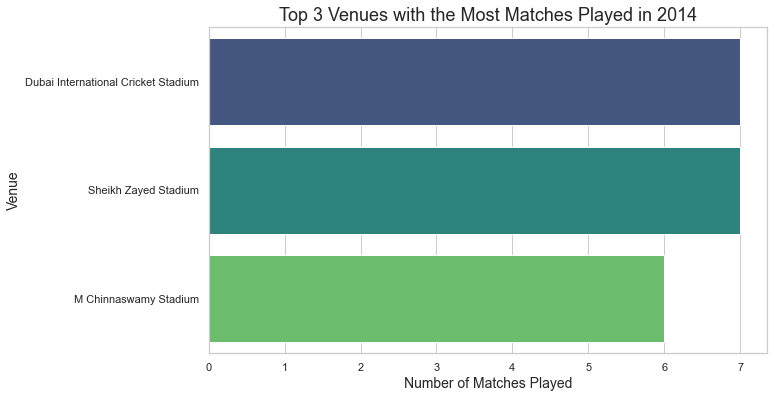

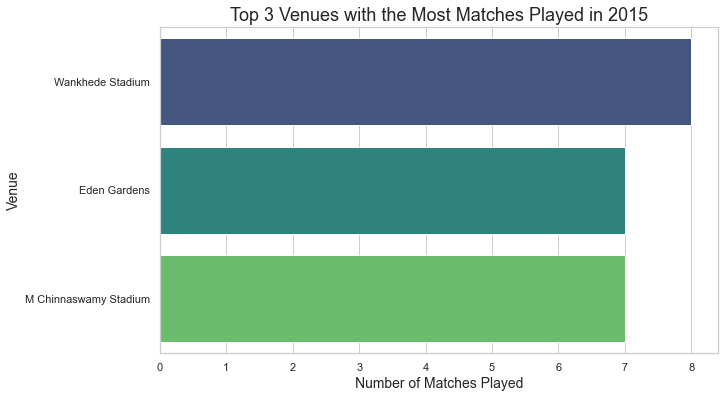

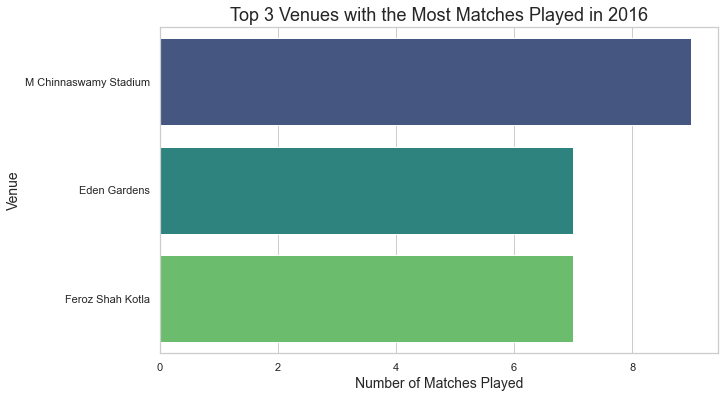

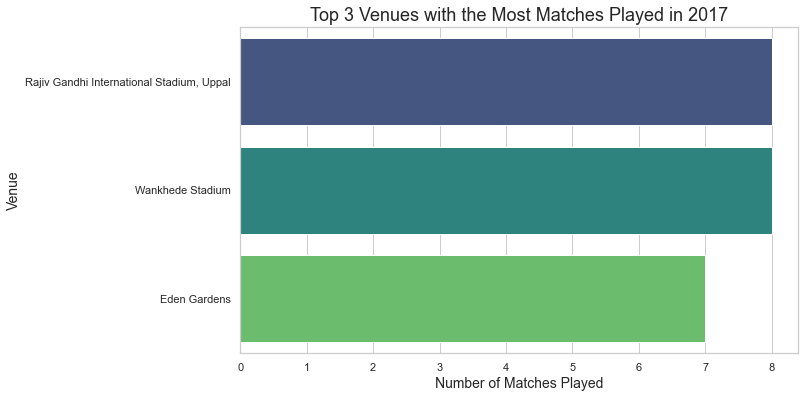

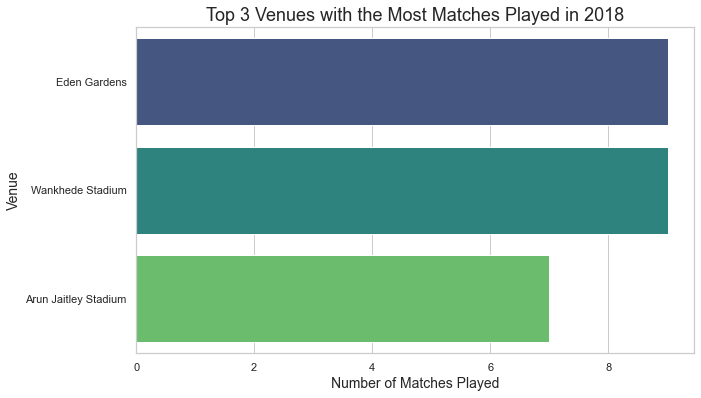

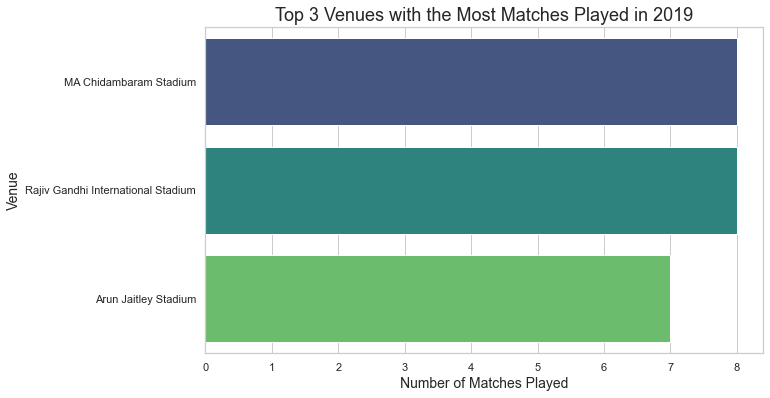

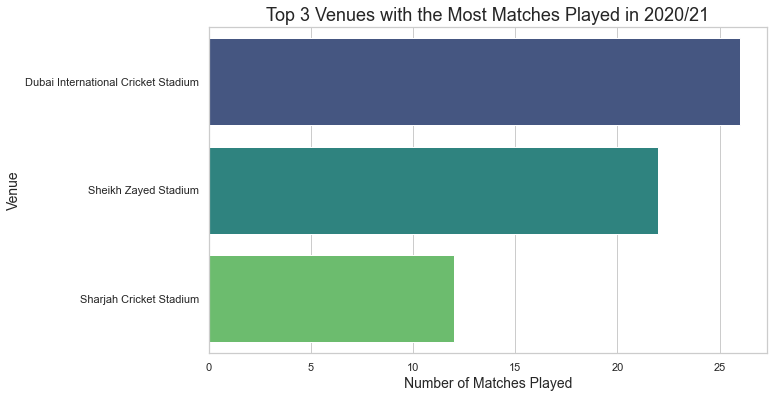

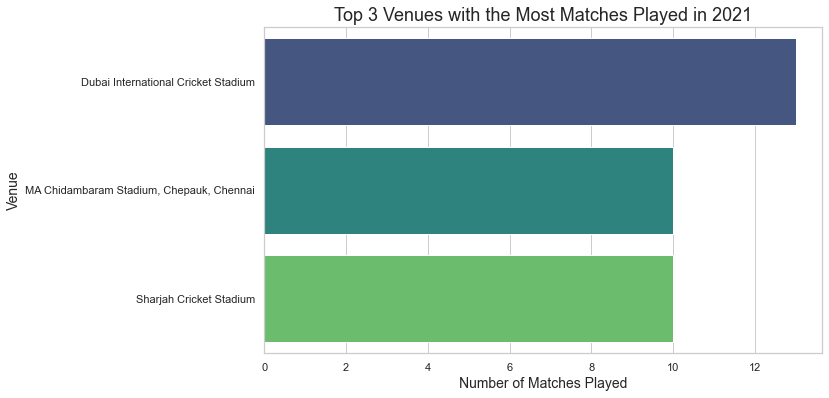

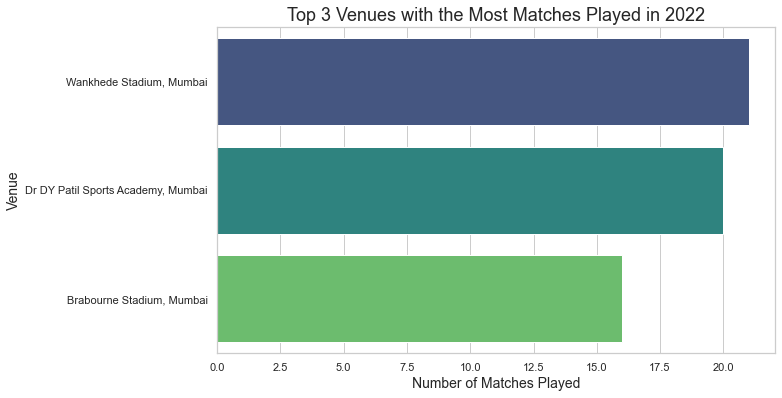

In [160]:
for year in unique_years:
    top_venues = top_3_venues_by_year(year)

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='MatchesPlayed', y='Venue', data=top_venues, palette='viridis')
    plt.title(f'Top 3 Venues with the Most Matches Played in {year}',fontsize=18)
    plt.xlabel('Number of Matches Played',fontsize=14)
    plt.ylabel('Venue',fontsize=14)
    plt.show()